
# <p style="text-align: center;  margin-bottom: -1cm;">CMSE 201: Introduction to Computational Modeling and Data Analysis</p>
## <p style="text-align: center; margin-bottom: 0cm;">Spring 2024</p>

### <p style="text-align: center; margin-bottom: -1cm;">Lowell Monis</p>
### <p style="text-align: center;">April 14, 2024</p>

***

**Project Designation:** Semester Project

**Section:** 002

**Instructor:** Dr. Liangzhang Bao

***

## Preamble

Before going through this project, ensure you run the following cell to install modules and packages if you haven't installed them. The code is in `raw` format, so ensure you change that.

***

This study will need the use of the following Python Modules. Run the following cell to import these modules.

***

In [1]:
# Matplotlib Setup

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight') # Setting plot style

# Numpy Setup
import numpy as np

# Pandas Setup
import pandas as pd

# Seaborn Setup
import seaborn as sns
sns.set_context('paper')

# DateTime Setup
from datetime import timedelta, datetime, date

# SciPy Setup
from scipy.optimize import curve_fit

# SARIMA Setup
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Autocorrelation Plot Functions
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX function to construct the model
from pmdarima.arima import auto_arima # auto_arima() function
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal Decomposition Functions
from statsmodels.tsa.stattools import adfuller # ADF test

# Interactive Plotting Setup: plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

# Miscellaneous
import warnings # To hide any and all warnings and ensure a cleaner notebook

***

The data set associated with this study is freely available for download on Kaggle [1]. Since this data set is updated frequently, there cannot be a guarantee that the programs in this notebook will run the same way if there is more data. Thus, please download the data set attached with this project. Please note that model generation may take copious amounts of time. Apologies for the inconvenience, and thank you for your patience.

***

# <u><p style="text-align: center; margin-bottom: -1cm;">The Dynamics behind Exchange Rates</p></u>
## <p style="text-align: center; margin-bottom: 0cm;">Analytical Insights and Predictive Modeling through the Fluctuations of the Euro</p>

## Background and Motivation

The inception of the Euro (symbolized with € and represented by ISO 4217 code *EUR*) in 1999 marked a significant milestone in the history of European monetary policy, consolidating 11 European Union member states under a single currency managed by the European Central Bank (ECB). Over the past two decades, the euro has evolved into one of the world's primary reserve currencies, shaping global financial markets and trade dynamics. The contemporary landscape of financial markets is marked by the perpetual ebb and flow of currency exchange rates, where even minor fluctuations can have far-reaching consequences. Understanding the factors influencing the euro's exchange rate fluctuations is of paramount importance for various stakeholders, including policymakers, investors, and multinational corporations engaged in international trade.

Forecasting exchange rates is a critical task in the realm of finance, influencing decisions made by investors, businesses, and policymakers alike. Among the various currency pairs, forecasting the exchange rate between the Euro and the US Dollar (USD) holds particular significance due to the Euro's status as the official currency in most European Union countries and the USD's role as the world's primary reserve currency.

Time series modeling techniques provide a powerful framework for forecasting exchange rates by capturing the underlying patterns and dynamics in historical data. Seasonal patterns, trends, and residual fluctuations can be identified through time series decomposition, laying the groundwork for selecting an appropriate forecasting model.

One prominent approach for time series forecasting is the Seasonal Autoregressive Integrated Moving Average (SARIMA) model. SARIMA models are well-suited for capturing both seasonal and non-seasonal patterns in time series data, making them particularly relevant for forecasting exchange rates that often exhibit periodic fluctuations.

In addition to forecasting future exchange rates, understanding the relationship between significant economic events and exchange rate movements is crucial for gaining insights into currency market dynamics. Analyzing how exchange rates behave before and after major economic events can provide valuable insights into the market's reaction and the factors driving currency fluctuations. This will be covered through the extensive data analysis conducted during the course of this study.

The choice to investigate Euro exchange rate fluctuations stems from the pressing need to address the challenges posed by the volatility of currency markets. Despite extensive research and analysis, accurately forecasting these fluctuations remains a formidable task due to the multifaceted nature of the factors influencing exchange rates. This project aims to fill the existing gaps in knowledge by employing advanced data analytics and modeling techniques to unravel the underlying patterns driving Euro exchange rate dynamics.

The dataset [19] curated by Daria Chemkaeva, which is updated regularly, provides a comprehensive time series of daily exchange rates per euro against a multitude of currencies spanning more than two decades, information courtesy of the ECB. This rich repository of exchange rate data offers an invaluable opportunity to delve into the dynamics of currency markets, unraveling the intricate relationships between macroeconomic variables and exchange rate movements. Moreover, the dataset encompasses currencies that have transitioned to the euro, shedding light on historical currency regimes and the euro's impact on economic integration within the Eurozone.

Motivated by the need to elucidate the efficacy of predictive modeling in forecasting euro exchange rate fluctuations, this project embarks on a journey of data analysis and modeling. Leveraging advanced statistical techniques, the project endeavors to ascertain the predictive accuracy of exchange rate models and their applicability in real-world scenarios. By scrutinizing historical exchange rate data and employing robust modeling methodologies, this endeavor seeks to unearth insights that could inform decision-making processes across various sectors reliant on currency exchange dynamics.

The focus of this study can be defined by one question: **How many United States Dollars can you sell a Euro for on April 15, 2024?** *As of the synthesis of this notebook, the version of the dataset used was up to date until April 11, 2023.*

## Methodology

This section will cover a step-by-step pipeline of the study, from processing to analysis to modeling.

### Metadata and preliminary analysis

Note that the version of the dataset being used was last updated on April 11, 2024.

*How to read this data?*
Consider this example: Assume under the United States Dollar for April 8, 2024, the value is 1.0823. This translates to a value of nearly USD 1.08 per Euro. In this scenario, one euro has more value than one dollar at this exchange rate.

The data is read in as a Pandas DataFrame using the [`pandas.read_csv()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# Reading in the data set

data = pd.read_csv("euro-daily-hist_1999_2022.csv")

The data can be inspected by observing the first and last five rows of the data. This can also be done using `pandas.DataFrame.info` command, but this does not return the output in the form of a DataFrame. Note that this command is not to be confused with the function, which will return information on the DataFrame. One can differnetiate between the two with the inclusion of parantheses.

In [3]:
data

Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0      2024-04-11               1.6448           1.9558            5.4468   
1      2024-04-10               1.6399           1.9558             5.433   
2      2024-04-09               1.6407           1.9558            5.4489   
3      2024-04-08               1.6433           1.9558            5.4806   
4      2024-04-05               1.6461           1.9558            5.4633   
...           ...                  ...              ...               ...   
6530   1999-01-08               1.8406              NaN               NaN   
6531   1999-01-07               1.8474              NaN               NaN   
6532   1999-01-06               1.8820              NaN               NaN   
6533   1999-01-05               1.8944              NaN               NaN   
6534   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
0                1.4688         0.9787                   7.7646   
1                1.4728          0.981                   7.8548   
2                1.4749         0.9819                   7.8603   
3                1.4715         0.9807                   7.8282   
4                1.4702         0.9793                   7.8421   
...                 ...            ...                      ...   
6530             1.7643         1.6138                      NaN   
6531             1.7602         1.6165                      NaN   
6532             1.7711         1.6116                      NaN   
6533             1.7965         1.6123                      NaN   
6534             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
0                 NaN          25.392          7.4604  ...          4.9713   
1                 NaN          25.368          7.4594  ...          4.9690   
2                 NaN           25.38           7.459  ...          4.9682   
3                 NaN          25.354          7.4588  ...          4.9681   
4                 NaN          25.286           7.459  ...          4.9677   
...               ...             ...             ...  ...             ...   
6530          0.58187          34.938          7.4433  ...          1.3143   
6531          0.58187          34.886          7.4431  ...          1.3092   
6532          0.58200          34.850          7.4452  ...          1.3168   
6533          0.58230          34.917          7.4495  ...          1.3168   
6534          0.58231          35.107          7.4501  ...          1.3111   

     [Russian rouble ] [Swedish krona ] [Singapore dollar ]  \
0                  NaN           11.531              1.4518   
1                  NaN          11.4345              1.4605   
2                  NaN          11.4555              1.4623   
3                  NaN          11.4675              1.4607   
4                  NaN           11.526              1.4608   
...                ...              ...                 ...   
6530           27.2075           9.1650              1.9537   
6531           26.9876           9.1800              1.9436   
6532           27.4315           9.3050              1.9699   
6533           26.5876           9.4025              1.9655   
6534           25.2875           9.4696              1.9554   

     [Slovenian tolar ] [Slovak koruna ] [Thai baht ] [Turkish lira ]  \
0                   NaN              NaN        39.22         34.6336   
1                   NaN              NaN       39.536         35.0329   
2                   NaN              NaN       39.529         34.9828   
3                   NaN              NaN       39.769         34.8481   
4                   NaN              NaN       39.743         34.6312   
...                 ...              ...          ...             ...   
6530           188.8400           42.560      42.5590          0.3718 

A clearer understanding can be gained by utilizing the [`pandas.DataFrame.info()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html). 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

One can observe that:

* The dataset begins in the year 1999 and has updated values till 2024.
* Data points are arranged in descending order of date, i.e., fresh data is on the top.
* The dataset has 41 columns and 6534 rows, indicating that there are 40 circulated and defunct currencies included, and nearly 26 years worth of data.
* There are indeed missing values: newer currencies have missing values in the bottom half, while now defunct currencies have missing values towards the top.
* Some variations in terms of missing values for example are in the case of the Russian rouble, which has no recent values despite existing as a currency. The last recorded observation for the rouble was on March 1, 2022, shortly after the invasion of Ukraine. This is result of sanctions prohibiting the trade of the Russian rouble in Europe, which is why there is no exchange rate available.
* Most columns are of featureless `object` data type, with some currencies being `float64` values.

### Data cleaning and preparation

Before proceeding with the aims of the project, it is important to ensure that the data being used is facile and lacking irregularities which will make it difficult to use.

From the earlier section, one can obsweve that the column names are structured in a format difficult to utilize. Extracting the data using slicing will be exceptionally difficult, especially when the column is named `[US dollar ]`, and using index values is counterproductive to someone who is not very familiar with a dataset of these dimensions.

Columns can be renamed using the [`pandas.DataFrame.rename()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html). To simplify this process, one can implement a loop and string functions.

In [5]:
# Creating a dictionary to store the new names.
new_names = {'Period\\Unit:': 'Date'} # One can manually set the name for the Period Column.
# Note the usage of the double slash.
# This is to ensure that the IDE doesn't confuse the backslash for an escape sequence. Check appendix.

# Iterating through the column names of the DataFrame.
for column in data.iloc[:,1:]: # Excluding the time column.
    updated_name = "" # Creates an empty string to store the new column name.
    for character in column: # Iterates through each character in the column name.
        if character == " ": # Replaces spaces with an underscore.
            updated_name += "_"
        elif character.isalpha(): # Include alphabets in the new name.
            updated_name += character
        elif character == "_": # Preserve any underscores.
            updated_name += character
            # This is to prevent the removal of any underscores previously added in case the code is run again accidentally.
            # The entire code is designed in a way that no matter how many times the code is run, the changes only occur the first time.
        else: # Essentially deletes all the other characters by not including them in the new name.
            pass
    if updated_name[-1] == "_": # Removes the last underscore in the names created as a result of the space after the currency name.
        updated_name = updated_name[:-1] # Slices all characters but the last.
    new_names[column] = updated_name # Includes the conversion parameters to the dictionary

# Updating the DataFrame with the new names.
data = data.rename(columns = new_names)

In order to aid with sorting, the `Date` variable can be converted to the `datetime64` data type using the [`pandas.to_datetime()` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [6]:
# Converting the Date variable to the datetime64 data type
data['Date'] = pd.to_datetime(data['Date'])

If there rises a scenario where one has to group the data based on year, it would be easier to facilitate if there is a column for the year of the data point. One can use the following pipeline to arrange this:

1. Extract the dates from column `Date`.
2. Convert the values to the string data type using the [`pandas.DataFrame.astype()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) set to `str`.
3. Use the [`pandas.Series.str.slice()` function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) to apply the slices to the whole column extracted all at once.
4. Convert the column to an integer using `pandas.DataFrame.astype()` set to `int` this time.
5. Save these updates to the DataFrame by indexing the newly created `pandas.Series` to a new column `Year`.

In [7]:
# Slicing starts at first character, ends at fifth character, with default step 1.
data['Year'] = data['Date'].astype('str').str.slice(0,4).astype('int')

Since the column was created, it is added as the last column. In order to reorder the DataFrame's columns and bring the `Year` column to the beginning, one uses the [`pandas.DataFrame.reindex()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html) and the [list comprehension method](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions): The function takes in a list with the column names using [`pandas.DataFrame.columns` command](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) in the order desired by the user. In this case, since there are over 40 columns of data, list comprehension is used to essentially downscale the `for` loop to one line. This extracts all currency columns and groups them after `Date` and `Year`.

In [8]:
# Reordering the columns.
data = data.reindex(columns = ['Date', 'Year'] + [col for col in data.columns if col not in ['Date', 'Year']])

Data in descending order by date could be inconvenient to read. This can be changed using the [`pandas.DataFrame.sort_values()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [9]:
data.sort_values('Date', inplace=True)

To easily access individual data points, the `Date` column can be made the index of the `DataFrame`, as opposed to numbering the data points. This can be executed using the [`pandas.DataFrame.set_index()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

In [10]:
# Making the dates the index values to the DataFrame, while saving the change permanently to this version using the inplace argument.
if "Date" in data.columns: # Ensures that no error takes place if the cell is accidentally run again.
    data.set_index(keys = 'Date', inplace = True)

Finally, one can proceed with the dropping of all defunct currencies, or currencies with no data, since they are not within the scope of this study. The [`pandas.DataFrame.drop()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html), [`pandas.DataFrame.columns` command](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) (used to extract the list of column names), and the [`pandas.isna()` function](https://pandas.pydata.org/docs/reference/api/pandas.isna.html) (check for missing values) is used.

In [11]:
for col in data.columns:
    if pd.isna(data[col][-1]): # Checks if the last currency exchange rate is missing; if it is, the currency is essentially not in circulation
        data.drop(columns = col, inplace = True) # inplace = True ensures that the new data is written over the old data in the same object

Using more currencies in the project may not add any value to it, but may instead render the work pointless, make the product crowded, and cause confusion to the reader. Therefore, in the context of this study, the following currencies will be considered.

1. **Australian Dollar**
2. Brazilian Real
3. **Canadian Dollar**
4. **Swiss Franc**
5. **Chinese Renminbi**
6. Indian Rupee
7. Indonesian Rupiah
8. **Great Britain Pound Sterling**
9. **Japanese Yen**
10. Mexican Peso
11. Turkish Lira
12. South African Rand
13. **United States Dollar**
14. Philippine Peso
15. Polish Zloty

The currencies have been chosen in a way to ensure that a plethora of results can be produced. Thus, there is a fair share of both strong and weak currencies [1]. The currencies in bold have been retained irrespective of their strength, in consideration of their positions as official reserve currencies by the International Monetary Fund [2].

In [12]:
selected_columns = ['Year',
    'Australian_dollar', 'Brazilian_real', 'Canadian_dollar', 'Swiss_franc', 
    'Chinese_yuan_renminbi', 'UK_pound_sterling', 'Indian_rupee', 
    'Japanese_yen', 'Mexican_peso', 'Turkish_lira', 'US_dollar',
    'South_African_rand', 'Indonesian_rupiah', 'Philippine_peso', 'Polish_zloty'
] # Selects out specific columns desired in the data

data = data[selected_columns] # Subsets the data

The preliminary data prepartion and cleaning process has been completed.

In [13]:
data

Year Australian_dollar Brazilian_real Canadian_dollar Swiss_franc  \
Date                                                                            
1999-01-04  1999            1.9100            NaN          1.8004      1.6168   
1999-01-05  1999            1.8944            NaN          1.7965      1.6123   
1999-01-06  1999            1.8820            NaN          1.7711      1.6116   
1999-01-07  1999            1.8474            NaN          1.7602      1.6165   
1999-01-08  1999            1.8406            NaN          1.7643      1.6138   
...          ...               ...            ...             ...         ...   
2024-04-05  2024            1.6461         5.4633          1.4702      0.9793   
2024-04-08  2024            1.6433         5.4806          1.4715      0.9807   
2024-04-09  2024            1.6407         5.4489          1.4749      0.9819   
2024-04-10  2024            1.6399          5.433          1.4728       0.981   
2024-04-11  2024            1.6448         5.4468          1.4688      0.9787   

           Chinese_yuan_renminbi UK_pound_sterling Indian_rupee Japanese_yen  \
Date                                                                           
1999-01-04                   NaN           0.71110          NaN       133.73   
1999-01-05                   NaN           0.71220          NaN       130.96   
1999-01-06                   NaN           0.70760          NaN       131.42   
1999-01-07                   NaN           0.70585          NaN       129.43   
1999-01-08                   NaN           0.70940          NaN       130.09   
...                          ...               ...          ...          ...   
2024-04-05                7.8421           0.85773      90.3283        164.1   
2024-04-08                7.8282           0.85795       90.159       164.43   
2024-04-09                7.8603           0.85663      90.4135       164.97   
2024-04-10                7.8548           0.85515      90.3585       164.89   
2024-04-11                7.7646           0.85525      89.4385       164.18   

           Mexican_peso  Turkish_lira US_dollar South_African_rand  \
Date                                                                 
1999-01-04      11.6446        0.3723    1.1789             6.9358   
1999-01-05      11.5960        0.3728    1.1790             6.7975   
1999-01-06      11.4705        0.3722    1.1743             6.7307   
1999-01-07      11.5511        0.3701    1.1632             6.8283   
1999-01-08      11.4414        0.3718    1.1659             6.7855   
...                 ...           ...       ...                ...   
2024-04-05      17.9104       34.6312    1.0841             20.171   
2024-04-08      17.8053       34.8481    1.0823            20.1574   
2024-04-09      17.7268       34.9828    1.0867            20.0861   
2024-04-10      17.7305       35.0329     1.086            20.0851   
2024-04-11      17.6448       34.6336    1.0729            20.1614   

           Indonesian_rupiah Philippine_peso Polish_zloty  
Date                                                       
1999-01-04           9433.61          45.510       4.0712  
1999-01-05           9314.51          44.745       4.0245  
1999-01-06           9337.68          44.872       4.0065  
1999-01-07           9218.77          44.436       4.0165  
1999-01-08           9321.63          44.295       4.0363  
...                      ...             ...          ...  
2024-04-05          17192.63          61.268       4.2835  
2024-04-08          17217.66          61.204       4.2773  
2024-04-09          17243.05          61.301       4.2565  
2024-04-10          17212.45          61.408       4.2563  
2024-04-11           17189.9          60.577        4.257  

[6535 rows x 16 columns]

### Exploratory Data Analysis



There are a lot of missing values in the data set, which need to be handled. However, since this is a Time Series data set [3], it would be counterintuitive to simply drop the rows with null values. Instead, the data set's columns were interpolated using [`pandas.DataFrame.interpolate()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) in this case filling in the gaps, and back-filled using [`pandas.DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) in cases where their initial values are missing and there is no surrounding data for approval

In [14]:
data_filled = data

for col in data.columns:
    data_filled[col] = pd.to_numeric(data_filled[col], errors = 'coerce') # converts all data points to numerical values and coerce non-numerical values to be converted to NaN.
    data_filled[col] = data_filled[col].interpolate(method = 'time').fillna(method = 'bfill') # handles missing values by interpolation and backfilling

One can commence with the summary statistics of the data using the [`pandas.DataFrame.describe()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [15]:
data.describe()

Year  Australian_dollar  Brazilian_real  Canadian_dollar  \
count  6535.000000        6535.000000     6535.000000      6535.000000   
mean   2011.086764           1.580419        3.438497         1.465637   
std       7.296424           0.147248        1.275952         0.095906   
min    1999.000000           1.163900        1.563000         1.213900   
25%    2005.000000           1.487350        2.536600         1.399800   
50%    2011.000000           1.601000        3.096500         1.463300   
75%    2017.000000           1.668650        4.194250         1.535650   
max    2024.000000           2.073500        6.955300         1.812300   

       Swiss_franc  Chinese_yuan_renminbi  UK_pound_sterling  Indian_rupee  \
count  6535.000000            6535.000000        6535.000000   6535.000000   
mean      1.317466               8.463614           0.779349     66.474743   
std       0.225082               1.130574           0.099276     14.709133   
min       0.926000               6.555200           0.571100     38.497000   
25%       1.094750               7.625600           0.682650     55.201100   
50%       1.239400               8.093300           0.812800     67.514000   
75%       1.542600               9.343800           0.864965     79.166250   
max       1.680300              11.284000           0.978550     92.449000   

       Japanese_yen  Mexican_peso  Turkish_lira    US_dollar  \
count   6535.000000   6535.000000   6535.000000  6535.000000   
mean     128.950518     16.723018      4.800367     1.187385   
std       16.280793      4.629517      6.460268     0.157133   
min       89.300000      7.623800      0.370100     0.825200   
25%      117.745000     13.759000      1.735900     1.086700   
50%      129.490000     16.983200      2.267400     1.178900   
75%      137.375000     20.248750      4.524600     1.306350   
max      169.750000     27.089600     35.182500     1.599000   

       South_African_rand  Indonesian_rupiah  Philippine_peso  Polish_zloty  
count         6535.000000        6535.000000      6535.000000   6535.000000  
mean            12.267514       13164.317311        57.549185      4.180750  
std              4.088280        2859.274627         7.717319      0.309179  
min              6.078500        6707.810000        36.836000      3.205300  
25%              8.935100       11434.625000        53.309000      3.985900  
50%             11.310900       13473.230000        58.553000      4.200600  
75%             15.817900       15675.500000        62.350000      4.372800  
max             21.156700       18239.610000        76.758000      4.952500

Now, one can prepare a correlation matrix of the data set to observe the relationships between the different currencies.

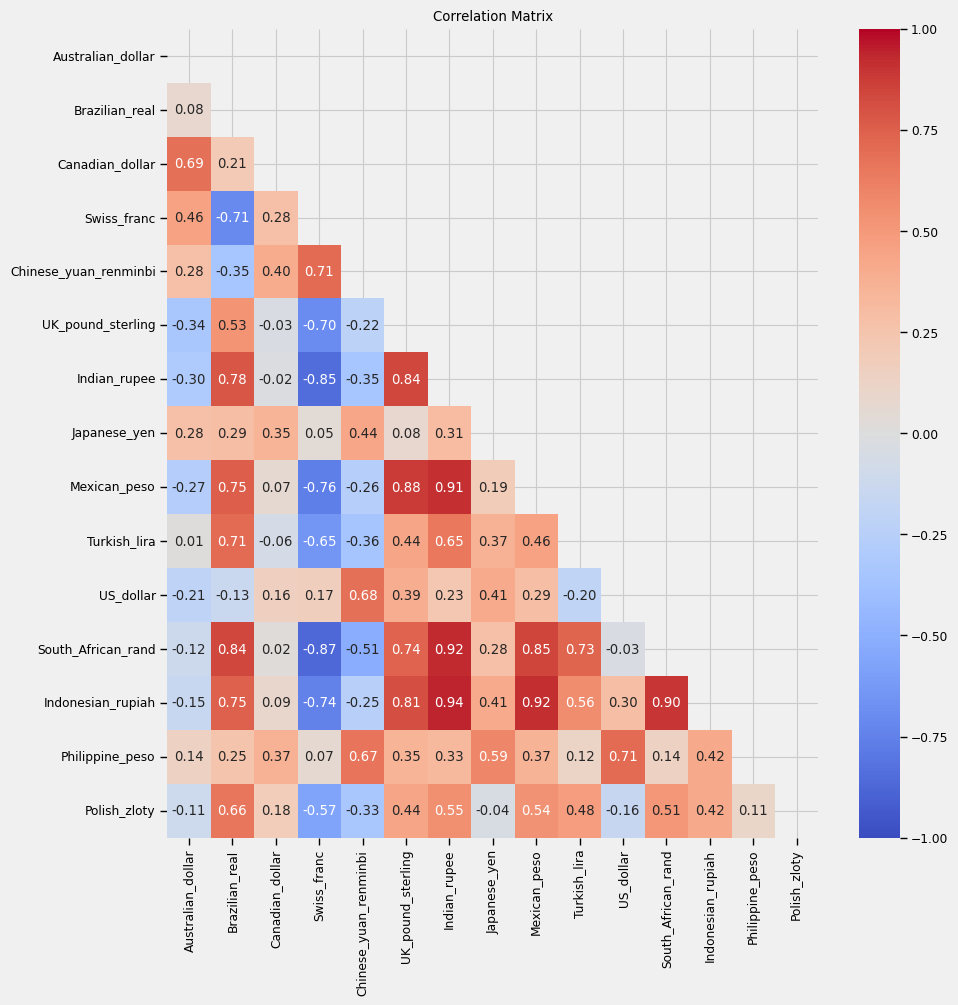

In [16]:
# Calculate the correlation matrix
corr_matrix = data_filled.iloc[:, 1:].corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, 
                         annot=True, # put the correlation coefficient in the plot
                         vmin = -1, vmax = 1, # set the limits equal for all the plots
                         fmt=".2f", # only 2 decimal digits
                         cmap='coolwarm', # color map
                         mask=mask # plot only the off-diagonal elements of the correlational matrix.
           )
plt.tight_layout()
plt.title('Correlation Matrix')
plt.show()

One can observe excellent correlation within the context of this data. Pairs like the Indian Rupee and the Indonesian Rupiah, the Indonesian Rupiah and the Mexican Peso, the Indian Rupee and the Mexican Peso, and the Indonesian Rupiah and the South african Rand. However, such relations within the context of the data set rather than macroeconomic principlels could be merely coincidental.

However, upon research [4], it was discovered that Indonesia and South Africa and really good trading partners, and South Africa is Indonesia's biggest partner in the African continent. Furthermore, some of the available BRICS nations [5] have overall better correlations, an indication of some sort of trade allignment, although, this is not statistically accurate.

Next, it is important to understand the true extents of the data: one such metric is gauging outliers in the data set. To commence, one needs to restructure the plot accomodating to the location. This can be done using [`pandas.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).

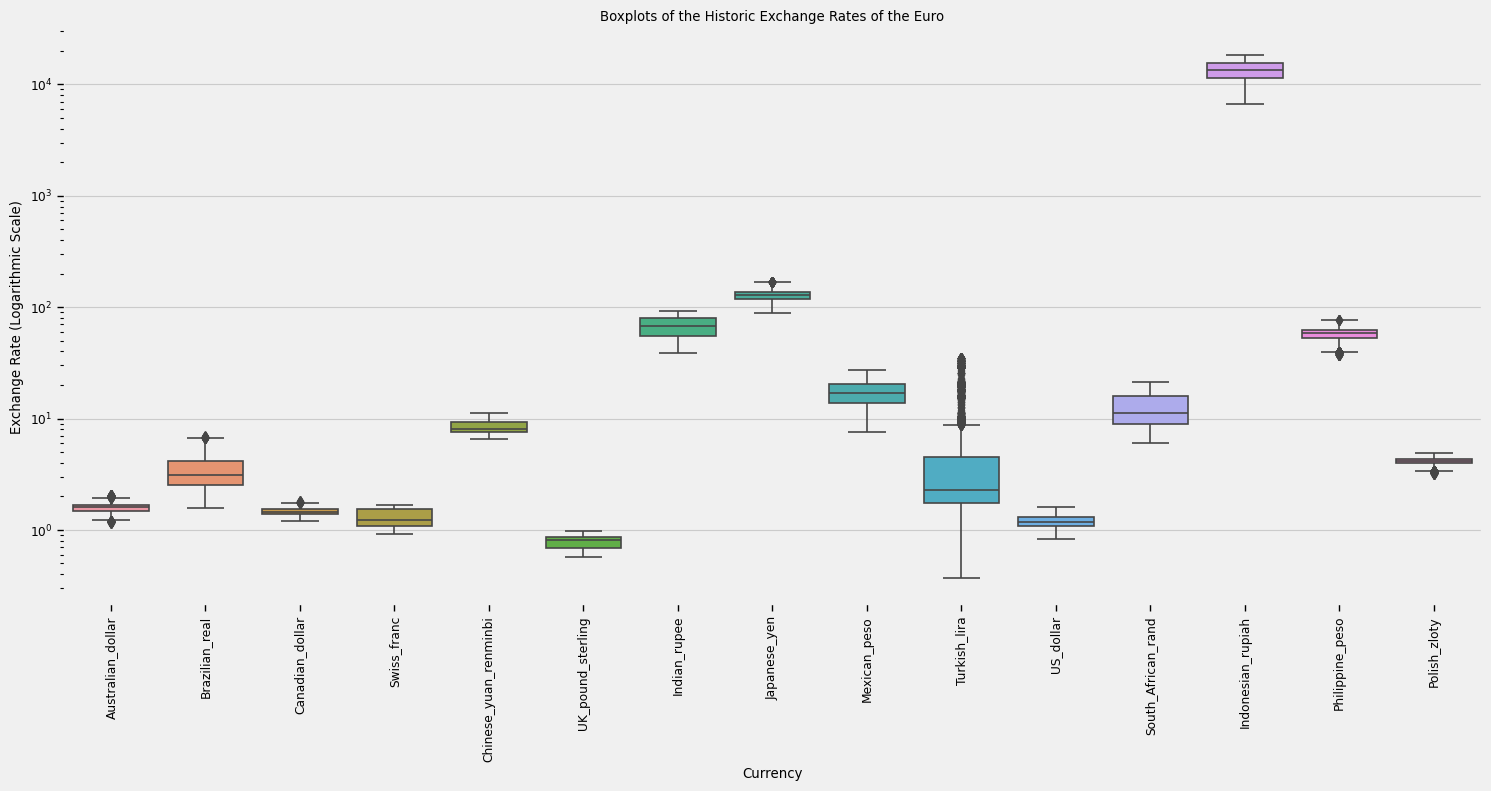

In [17]:
# Restructuring the data set to facilitate the creation of a boxplot
data_melted = data.melt(id_vars='Year', value_vars=selected_columns)  # Melt the DataFrame to convert it to long format

# Plotting the boxplot
plt.figure(figsize=(15, 8)) # Set the figure size
sns.boxplot(x='variable', y='value', data=data_melted) # Create the boxplot using seaborn
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.xlabel('Currency')
plt.ylabel('Exchange Rate (Logarithmic Scale)')
plt.title('Boxplots of the Historic Exchange Rates of the Euro')
plt.yscale('log')  # Set y-axis scale to logarithmic for better visualization of data distribution
plt.tight_layout()
plt.show()

Due to the sheer difference in magnitude going up to the fifth order, introducing the logarithmic scale became a priority to make the plots somewhat readable. One can observe in the above boxplots that the data set with the highest number of outliers (indicated by the noise surroundign the black lines showing the extent of true values, i.e., the 25th and 75th percentiles) is the Turkish Lira. From a preliminary understanding, it looks like most outliers are concentrated in the upper bound, or in the 75th percentile, and that the value of the rate is increasing quick. There are some currencies with no visible outliers on the boxplots. These currencies most likely fluctuated in an established pattern. An example here is the Indian Rupee.

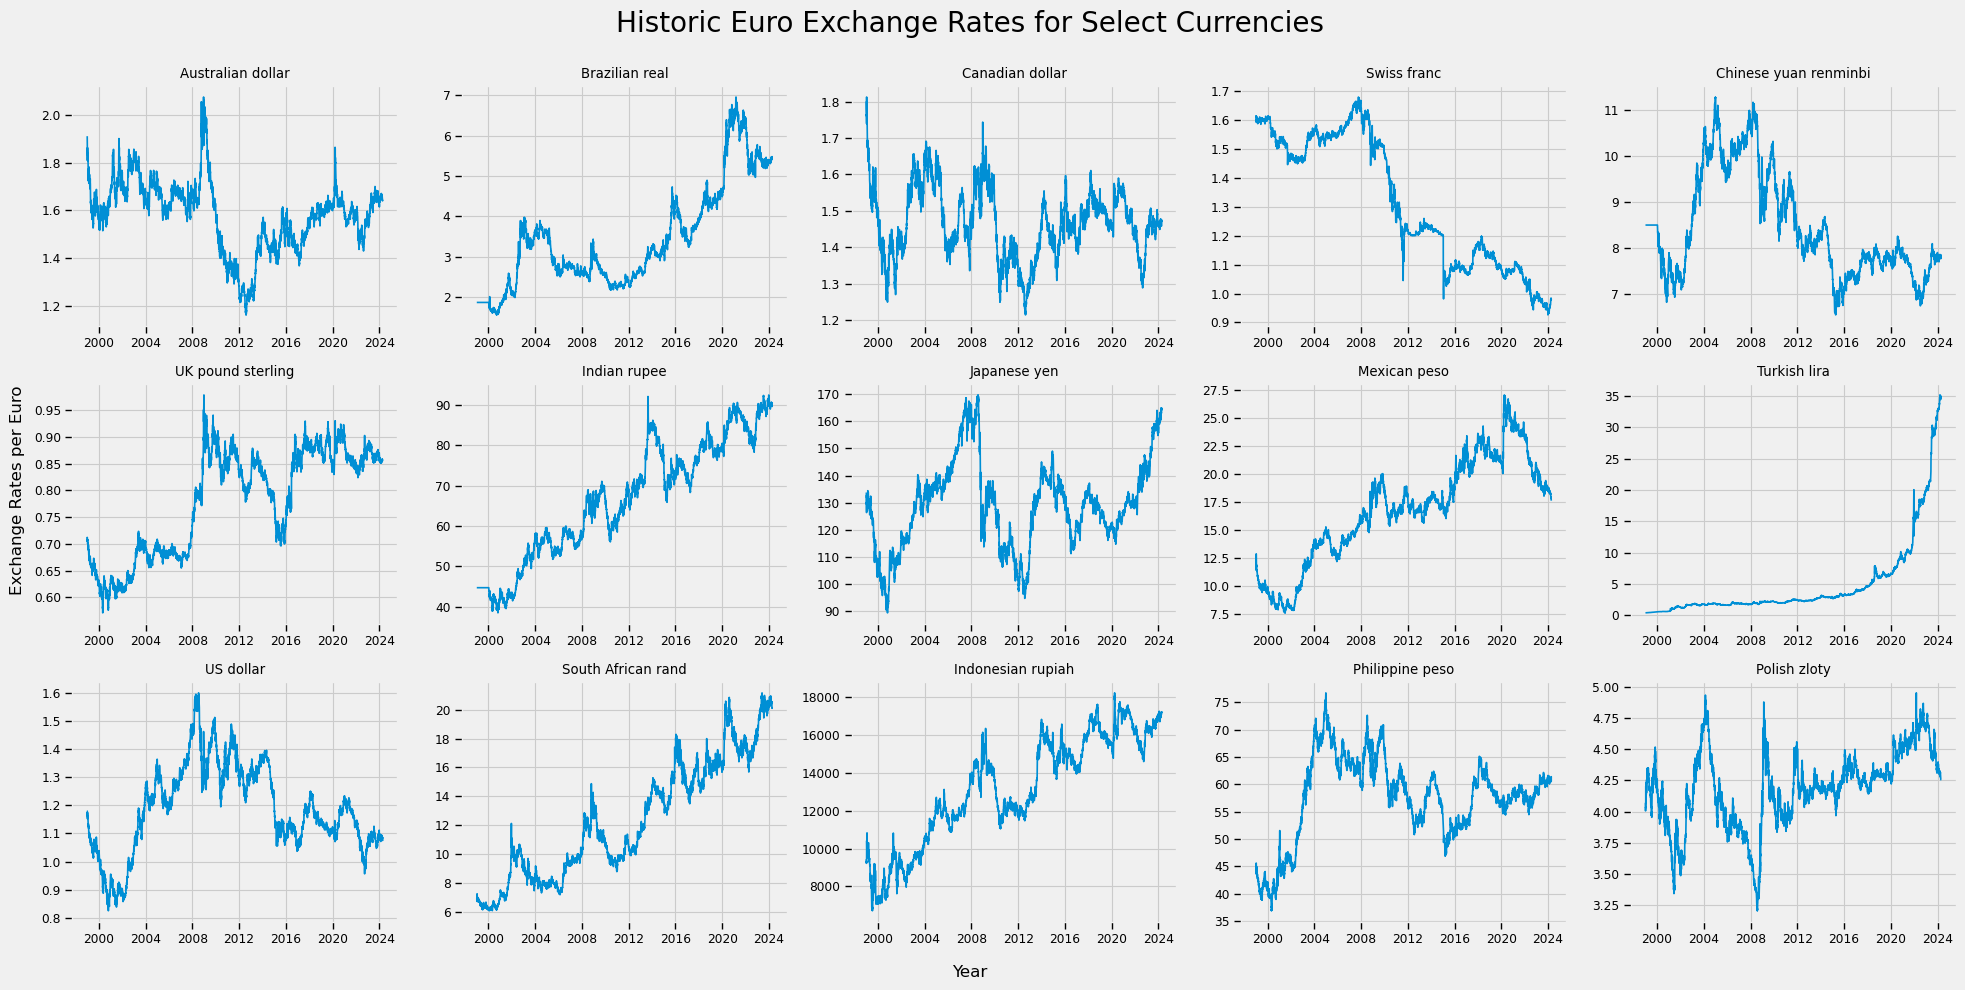

In [18]:
fig = plt.figure(figsize=(20, 10))  # Set up the figure
counter = 1  # Initialize subplot counter

# Plot each currency data in a subplot
for currency in data_filled.iloc[:, 1:]:
    currency_name = currency.replace("_", " ")  # Format currency name
    plt.subplot(3, 5, counter)
    plt.plot(data.index, data_filled[currency])
    counter += 1  # Increment subplot counter
    plt.title(currency_name)

# Set common x and y labels
fig.supxlabel("Year", fontsize=12)
fig.supylabel("Exchange Rates per Euro", fontsize=12)

fig.suptitle('Historic Euro Exchange Rates for Select Currencies', fontsize=20)

plt.tight_layout(rect=[0.01, 0.0, 1, 0.98])

plt.show()

As addressed before, the Indian Rupee is a more linearly growing currency. As mentioned before, the Turkish Lira has a sharp increase in its value in recent years, caused by an economic crisis starting 2018, as clearly demonstrated in the above plot.

The same plots as the above can be reproduced, this time with rolling averages to smoothen out the curve formed.

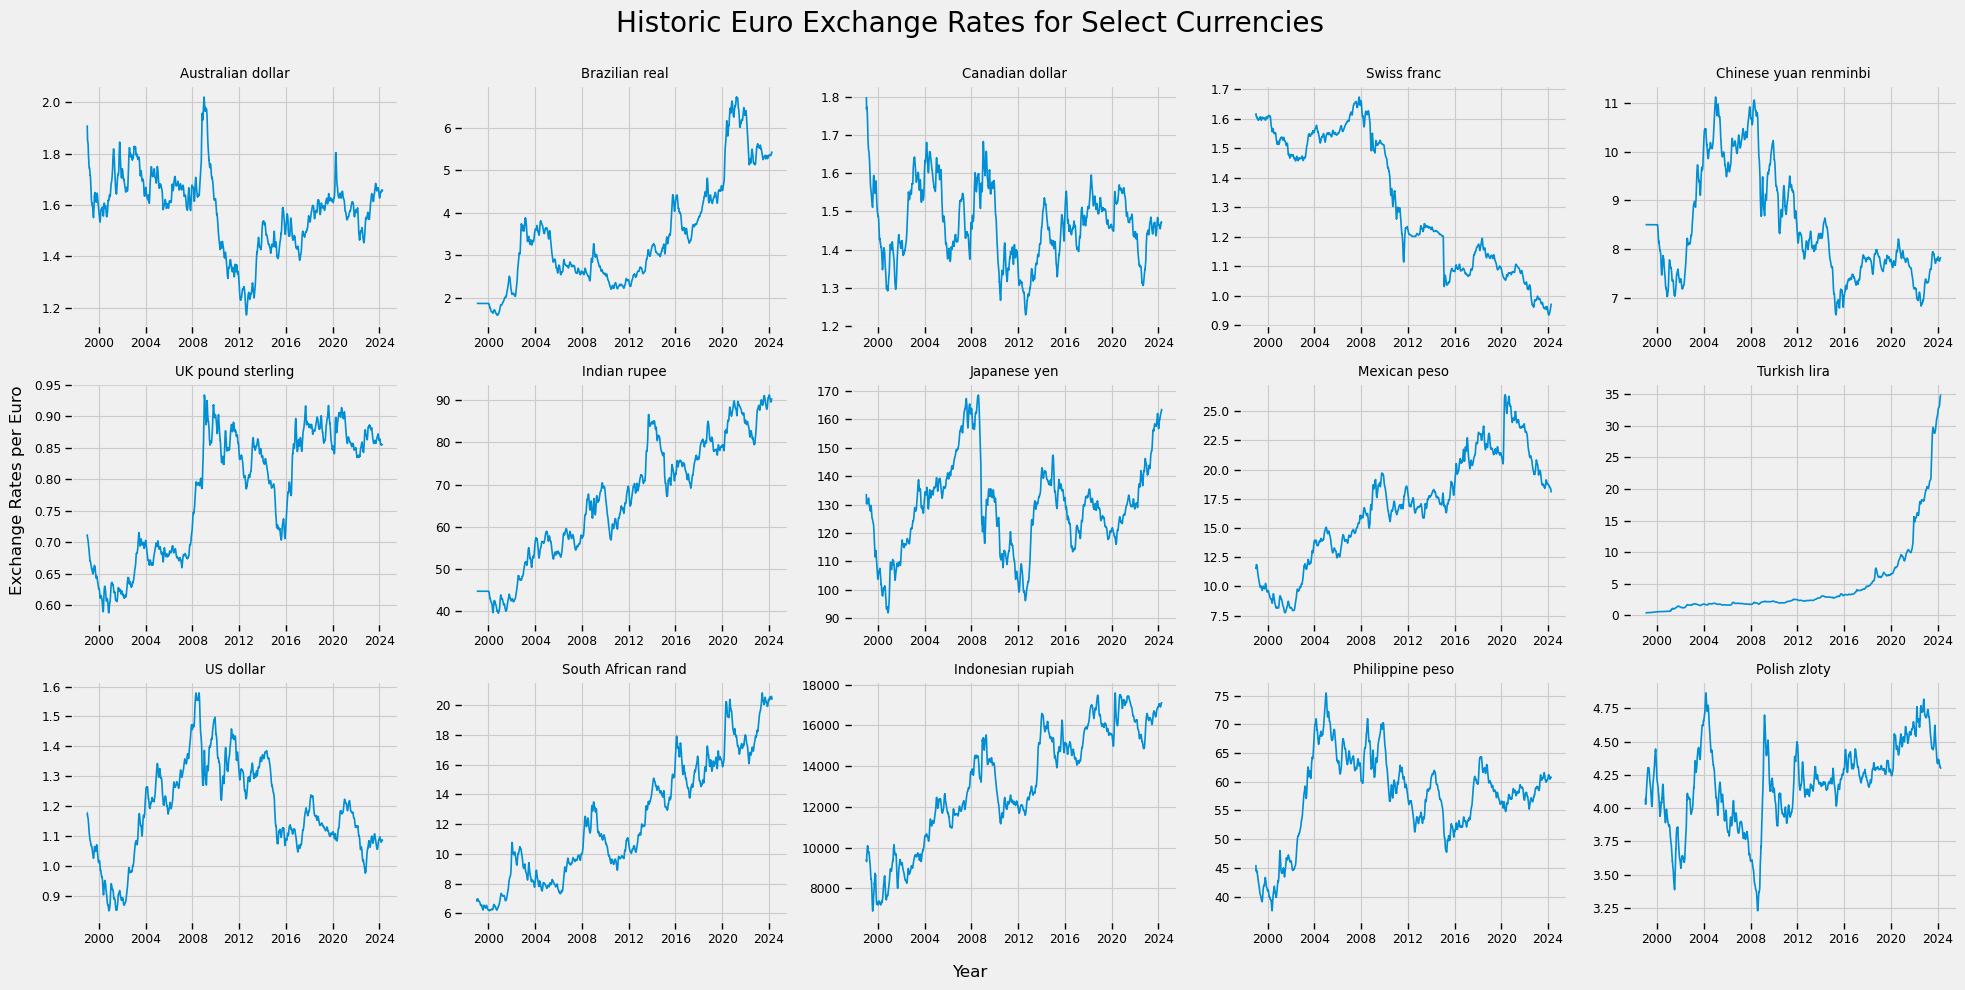

In [19]:
# Define the time delta for rolling mean calculation
delta = timedelta(days=30)

# Create a new figure with specified size
fig = plt.figure(figsize=(20, 10))

# Initialize subplot counter
counter = 1

# Loop through each currency column in the DataFrame
for currency in data.iloc[:,1:]:
    currency_name = currency.replace("_", " ")  # Format currency name
    plt.subplot(3, 5, counter)
    # Plot rolling mean of currency exchange rates over specified time delta
    plt.plot(data.index, data[currency].rolling(delta).mean())
    counter += 1  # Increment subplot counter
    plt.title(currency_name)

# Set common x and y labels for all subplots
fig.supxlabel("Year", fontsize=12)
fig.supylabel("Exchange Rates per Euro", fontsize=12)

fig.suptitle('Historic Euro Exchange Rates for Select Currencies', fontsize=20)

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout(rect=[0.01, 0.0, 1, 0.98])

plt.show()

From the above plots, consider the following snippets.

1. One can zoom into the US dollar plot. The EUR-USD exchange rate was the highest at one point of the time series. Coincidentally, this happened in 2008, when the world was knee deep in the 2007-2008 financial crisis.
2. Another noticeable trend is the sharp rise in the value of the Turkish lira, an indicative of the onset of the Turkish Economic Crisis, during the course of which the lira faces devaluation while the economy goes through unrelenting inflation. In 2021 alone, the lira devaluated by 44 [6]. One can see the exact timeframe when the crisis started, i.e., in January 2018, indicated by the red highlight.

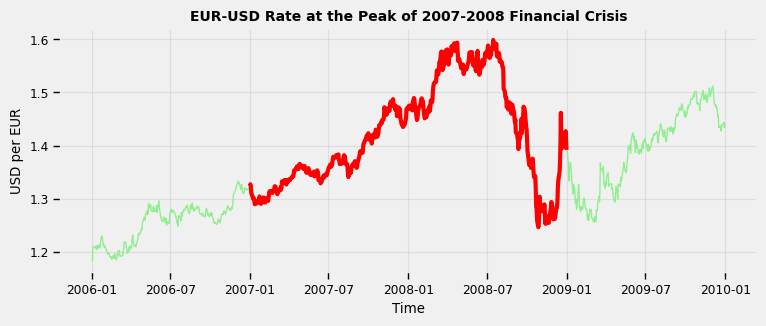

In [20]:
# subsetting the data
financial_crisis = data.copy()[(data.index.year >= 2006) & (data.index.year <= 2009)]
financial_crisis_7_8 = data.copy()[(data.index.year >= 2007) & (data.index.year <= 2008)]

# Plotting
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(financial_crisis.index, financial_crisis['US_dollar'], linewidth=1, color='lightgreen')
ax.plot(financial_crisis_7_8.index, financial_crisis_7_8['US_dollar'], linewidth=3, color='red')

# Adding labels and title
plt.title("EUR-USD Rate at the Peak of 2007-2008 Financial Crisis", fontsize=10, weight="bold")
plt.xlabel("Time")
plt.ylabel("USD per EUR")

# Adding grid with transparency
ax.grid(alpha=0.5)

plt.show()

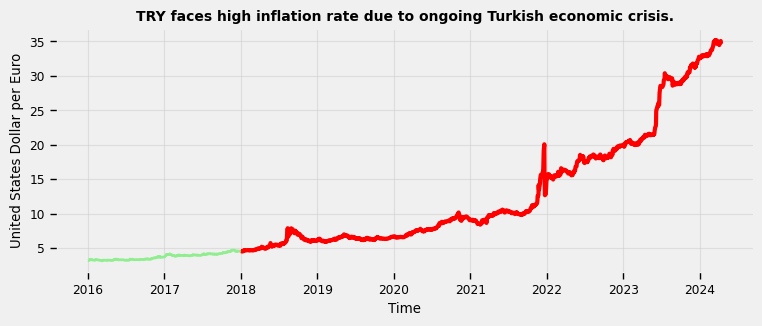

In [21]:
# subsetting the data
financial_crisis_turkiye = data.copy(
                   )[(data.index.year >= 2016)]
financial_crisis_t_highlight = data.copy(
                   )[(data.index.year >= 2018)]

# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis_turkiye.index,
        financial_crisis_turkiye['Turkish_lira'],
        linewidth=2, color='lightgreen')

# Highlighting the 2018-present period
ax.plot(financial_crisis_t_highlight.index,
        financial_crisis_t_highlight['Turkish_lira'],
        linewidth=3, color='red')

plt.title("TRY faces high inflation rate due to ongoing Turkish economic crisis.", fontsize = 10, weight = "bold")
plt.xlabel("Time")
plt.ylabel("United States Dollar per Euro")
# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

For the next part of the analysis, the index values are converted from `datetime` format to the ordinal counterpart of the date. [`pandas.Timestamp.toordinal()`](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html) is used here. This makes it easier to run regression models.

In [22]:
dates_numeric = np.array([date.toordinal() for date in data.index])

Now, one can define functions for the following.

1. Simple Linear Regression model `linear()`: This equation is in the form of a slope-intercept equation.
$$y = \beta_0 + \beta_1x + e$$
where $\beta_0$ is the intercept, $\beta_1$ is the slope, while $e$ is random error. Random error is disregarded for now. The value of the dependent variable, $y$, increases or decreases on average by a factor of $\beta_1$ with every unit increase in predictor variable $x$.

2. Coefficient of Determination ($R^2$) `R_squared()`: This is an important metric that verifies the fit of a regression model with the actual data. It can have values between 0 and 1 conventionally. Essentially a percentage, the closer the value is to 1, the better the line fits the data. Sometimes, $R^2$ can have extreme negative or overall absurd values. That is just an indicator that the line is a terrible fit for the data in question and is irrelevant to it completely.
$$R^2 = 1-\frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar y)^2}$$
where $y_i$ is the actual data point, $\hat{y_i}$ is the predicted value, $\bar y$ is the mean of the actual data points. Thus $\sum (y_i - \hat{y_i})^2$ is the sum of residuals squares, while $\sum (y_i - \bar y)^2$ is the sum of total squares.

In [23]:
def linear(x, m, b):
    '''
    This function returns the slope equation
    Inputs are the predictor values, the slope, and the intercept.
    '''
    return (m*x) + b

def R_squared(y_values, function_results):
    '''
    This function returns the R-Squared value.
    Inputs are the actual data points and the predicted data points.
    '''
    y_mean = np.mean(y_values)*np.ones(len(y_values))
    TSS = sum((y_values - y_mean) ** 2)
    RSS = sum((y_values - function_results) ** 2)
    coeff = 1 - (RSS/TSS)
    return coeff

One can now generate plots to visualize these lines of best fit, as well as compare them against their $R^2$ values. One acknowledges the source used to adjust tick labels on the plots [9].

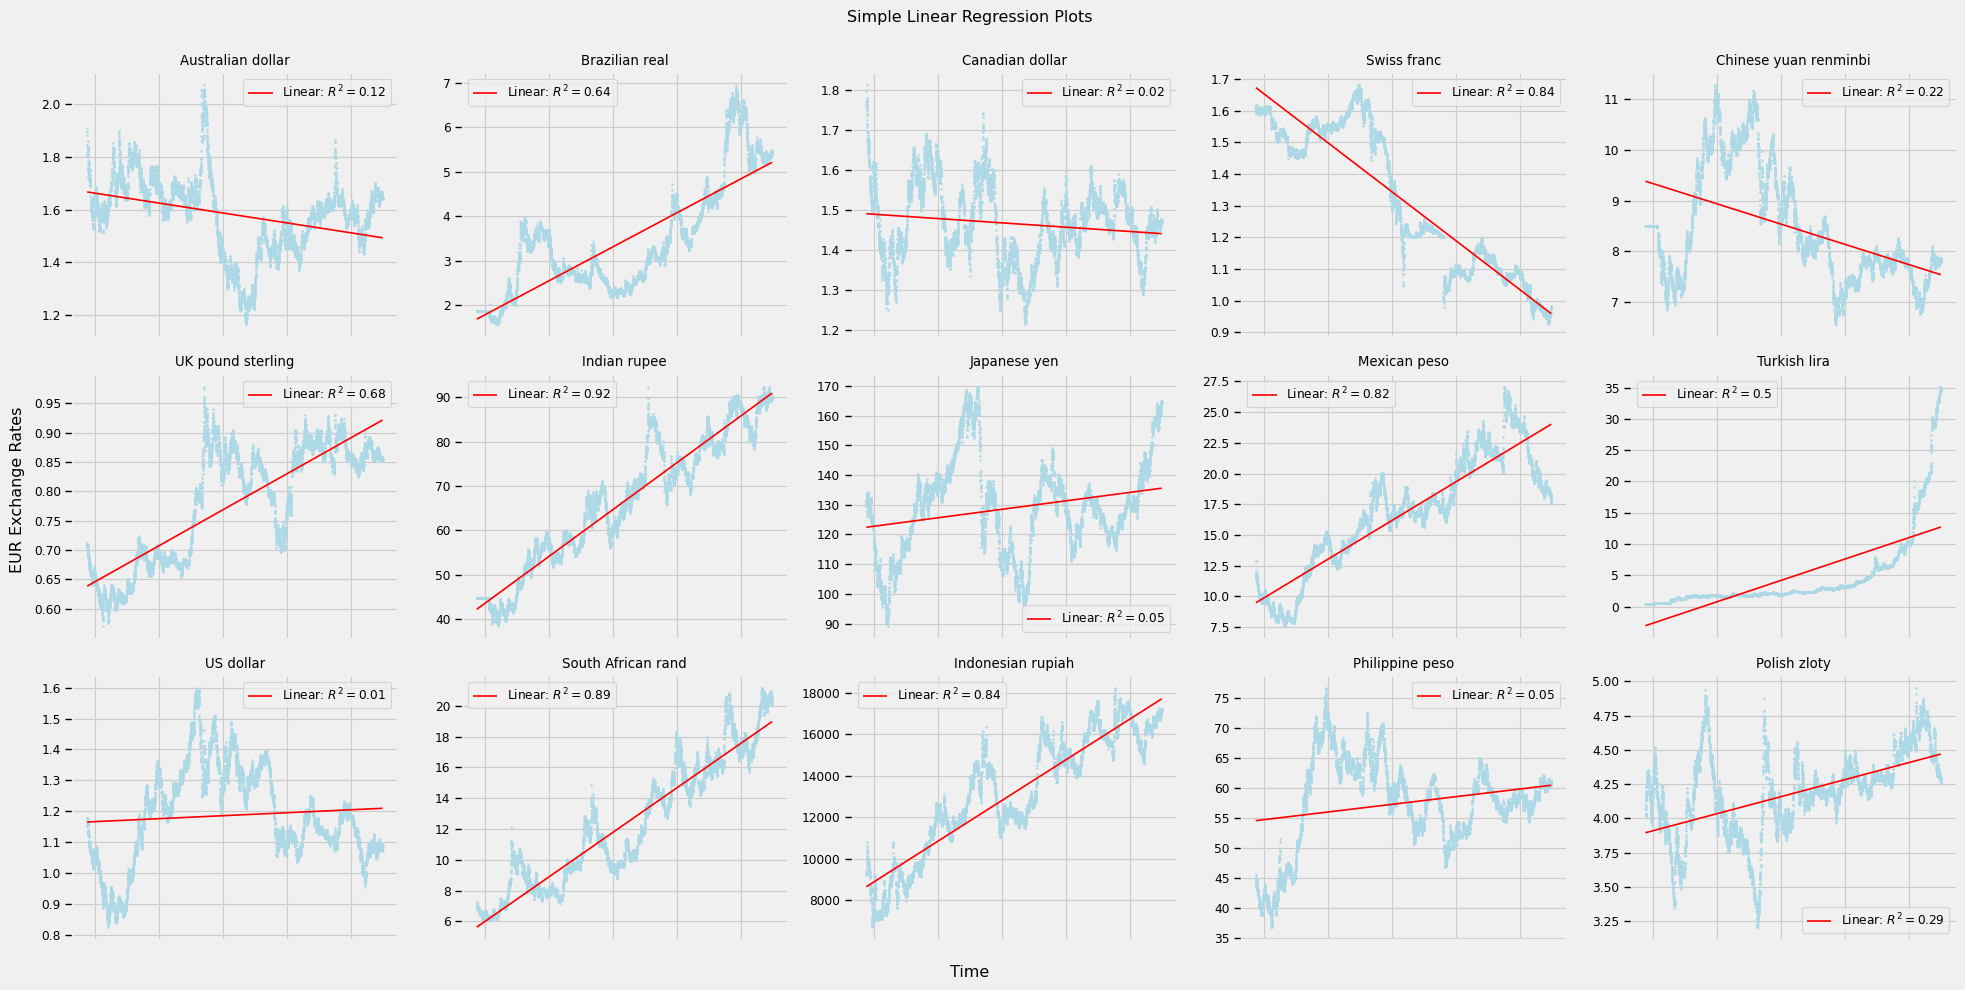

In [24]:
counter = 1 # subplot counter
fig = plt.figure(figsize=(20, 10))

# Iterate over each currency column
for currency in data_filled.iloc[:, 1:].columns:
    plt.subplot(3, 5, counter)  # Create subplot
    params_linear, cov_linear = curve_fit(linear, dates_numeric, data_filled[currency])  # Fit linear curve
    # Plot regression curve
    plt.plot(dates_numeric, linear(dates_numeric, *params_linear), c="red",
             label="Linear" + ": $R^2 = $" + str(np.round(R_squared(data_filled[currency], linear(dates_numeric, *params_linear)), 2)))
    plt.scatter(dates_numeric, data_filled[currency], s=1, c="lightblue")  # Plot data points
    plt.title(currency.replace("_", " "))  # Set subplot title with formatting
    counter += 1  # Increment subplot counter
    plt.legend()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    # Hiding tick labels to avoid potential confusion from ordinal date values

fig.suptitle("Simple Linear Regression Plots")
fig.supxlabel("Time")
fig.supylabel("EUR Exchange Rates")
plt.tight_layout(rect=[0.01, 0.0, 1, 0.98])
plt.show()

To gain more insight into the variability and linearity of the data, and to differentiate between linear and non-linear data points while identifying outliers, one can plot the residuals of the linear model [10].

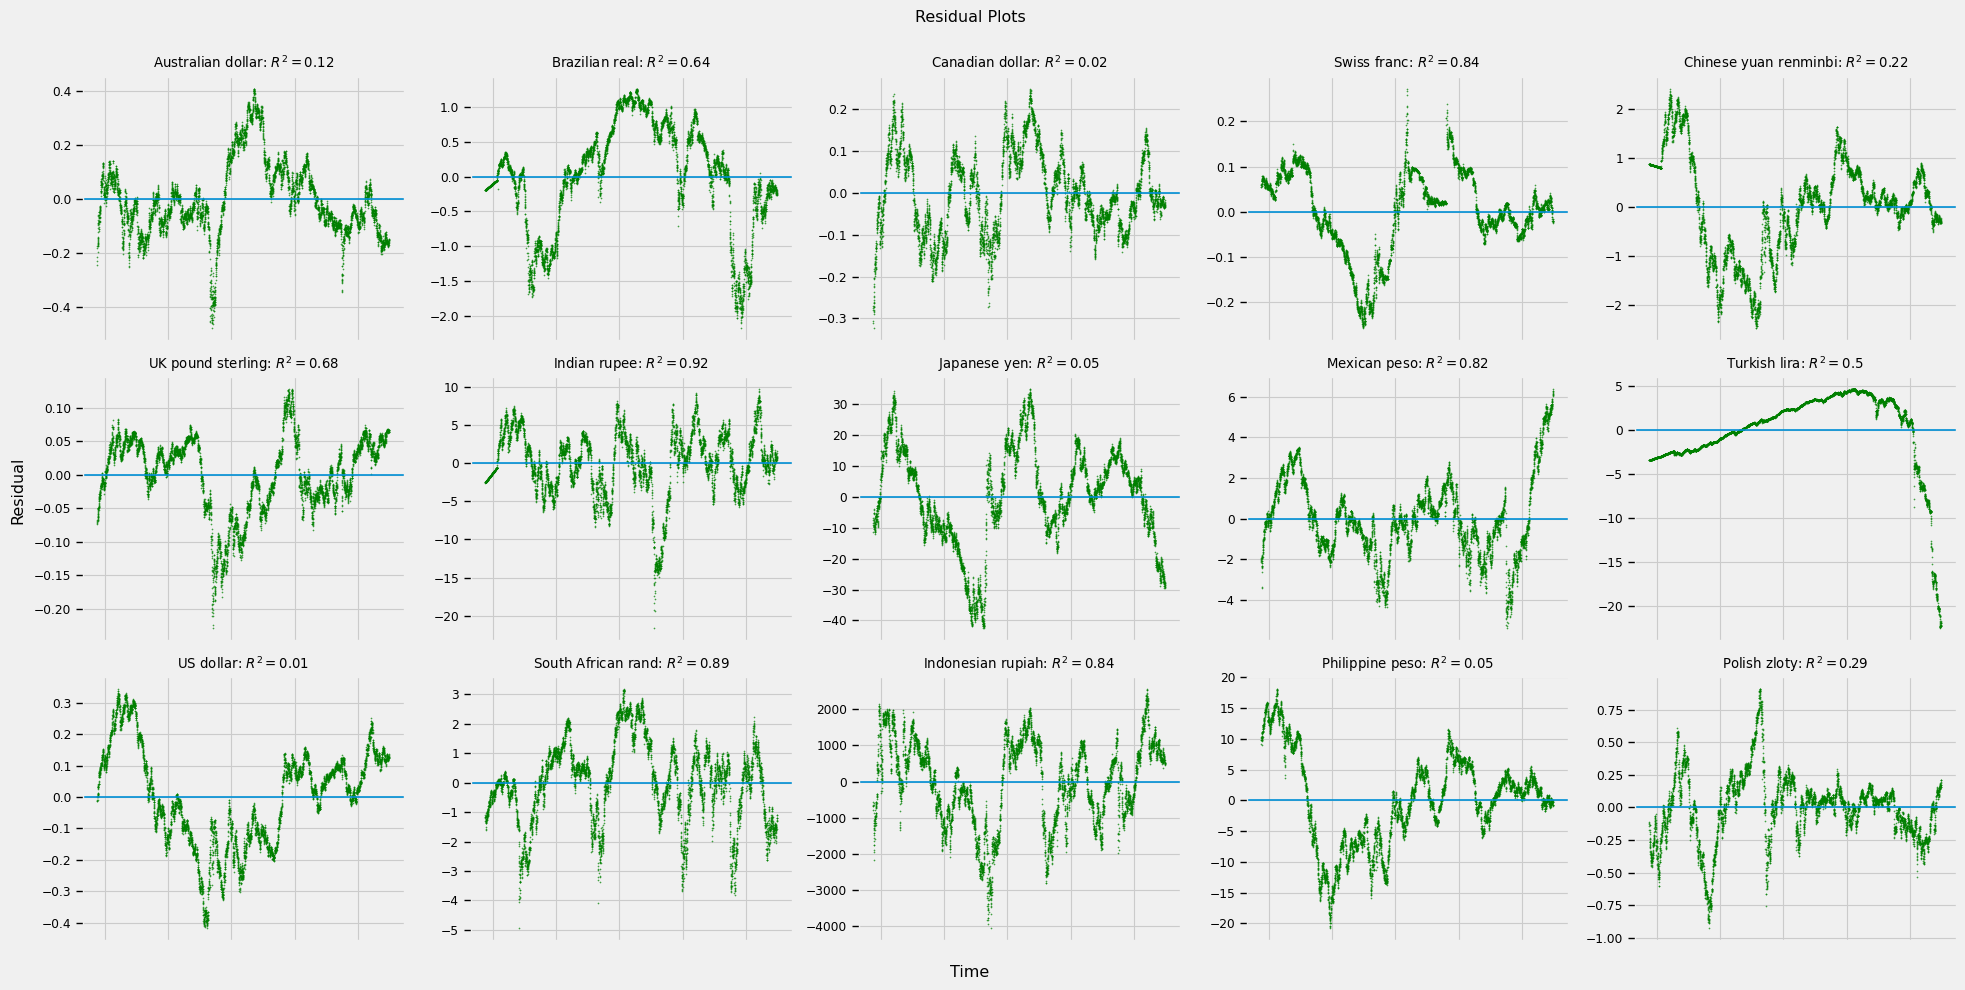

In [25]:
counter = 1
fig = plt.figure(figsize=(20,10))
for currency in data_filled.iloc[:,1:].columns:
    plt.subplot(3, 5, counter)
    params_linear, cov_linear = curve_fit(linear, dates_numeric, data_filled[currency])
    # Plotting residuals
    plt.scatter(dates_numeric, linear(dates_numeric, *params_linear) - data_filled[currency], c = "green", s = 0.1)
    plt.title(currency.replace("_", " ") + ": $R^2 = $" + str(np.round(R_squared(data_filled[currency],linear(dates_numeric, *params_linear)), 2)))
    plt.axhline(0) # Plotting the horizontal / regression line.
    counter += 1
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    # Hiding tick labels to avoid potential confusion from ordinal date values

fig.suptitle("Residual Plots")
fig.supxlabel("Time")
fig.supylabel("Residual")
plt.tight_layout(rect=[0.01, 0.0, 1, 0.98])
plt.show()

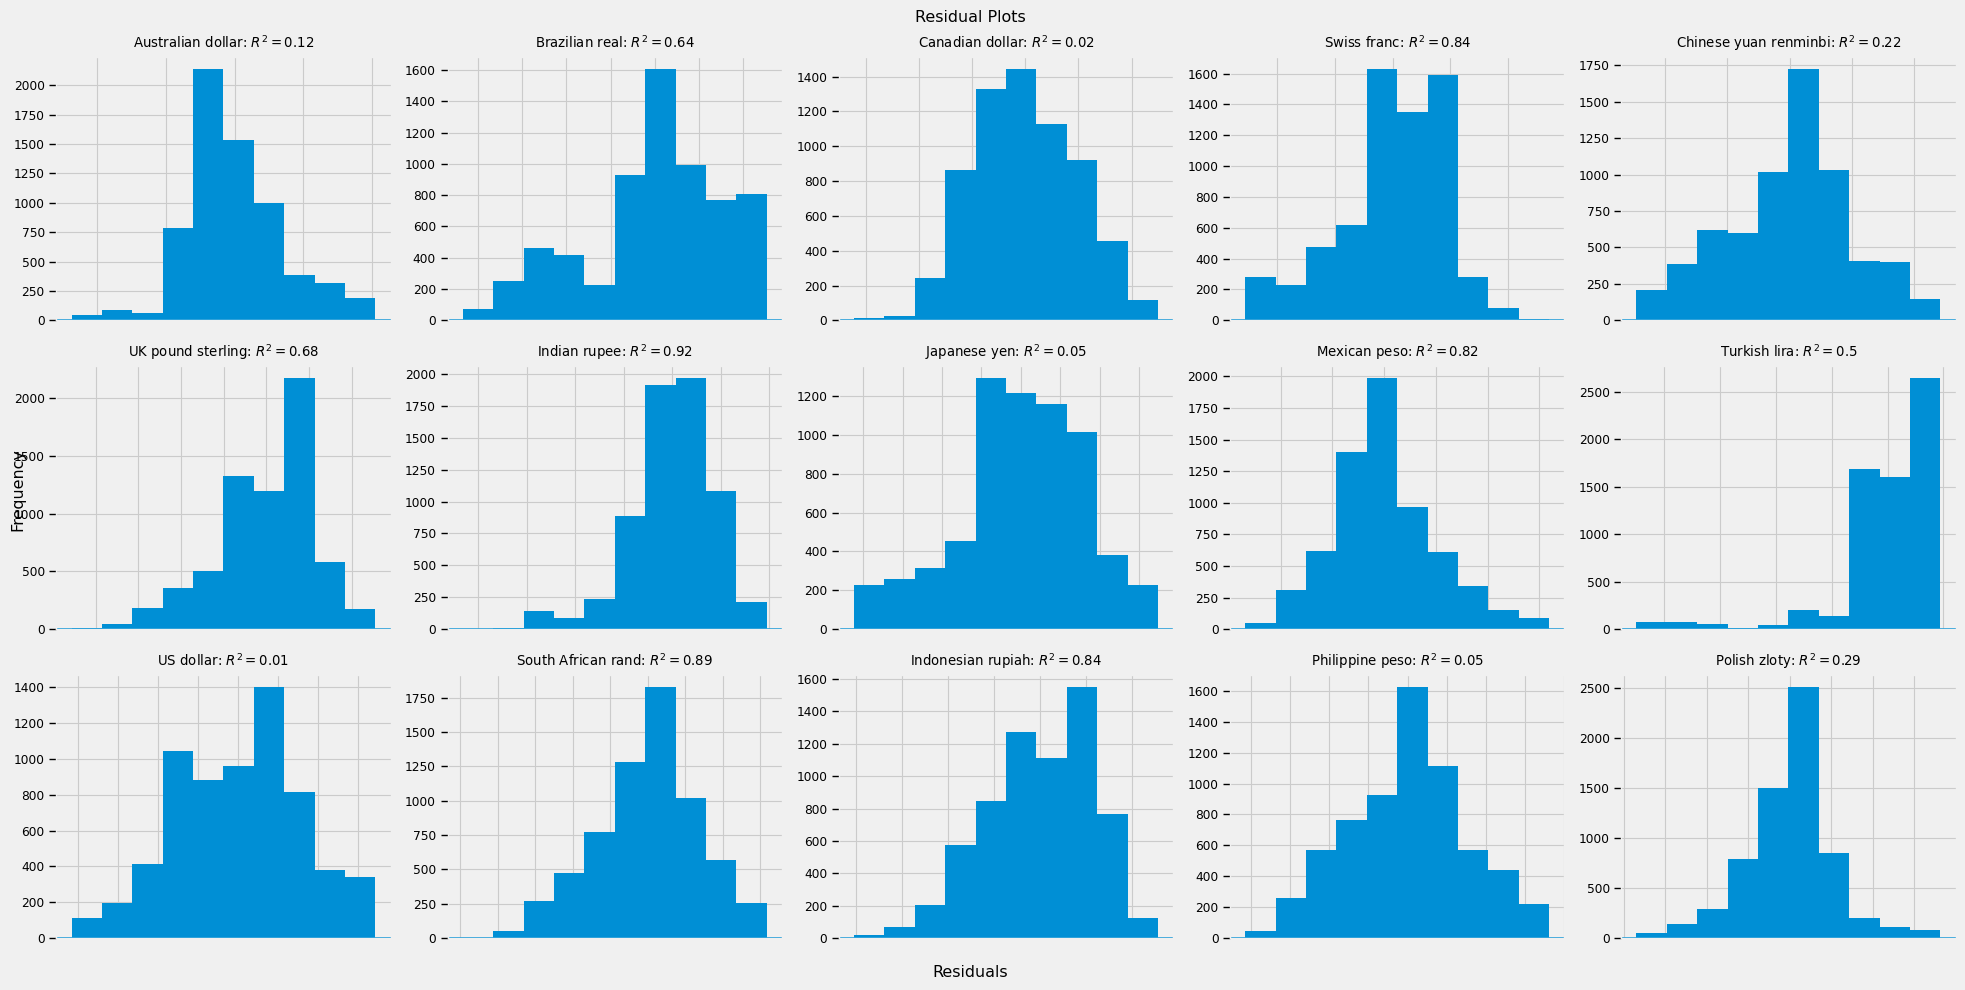

In [26]:
counter = 1
fig = plt.figure(figsize=(20,10))
for currency in data_filled.iloc[:,1:].columns:
    plt.subplot(3, 5, counter)
    params_linear, cov_linear = curve_fit(linear, dates_numeric, data_filled[currency])
    # Plotting residuals
    plt.hist(linear(dates_numeric, *params_linear) - data_filled[currency])
    plt.title(currency.replace("_", " ") + ": $R^2 = $" + str(np.round(R_squared(data_filled[currency],linear(dates_numeric, *params_linear)), 2)))
    plt.axhline(0) # Plotting the horizontal / regression line.
    counter += 1
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    # Hiding tick labels to avoid potential confusion from ordinal date values

fig.suptitle("Residual Plots")
fig.supxlabel("Residuals")
fig.supylabel("Frequency")
plt.tight_layout()
plt.show()

It is evident from the above that almost all currencies have outlier data. There are linear data points, like the Indian rupee, for example, that has the best fit, but the existence of so many outliers reduced its $R^2$ slightly, and a not-so-normally distributed residual plot. One can observe the non-linear nature of the US dollar, with a nearly U-shaped residual plot, a statement that is supported by its extremely low $R^2$ value.

### Modeling and Forecasting

*What will be the stock price tomorrow?* That is a perpetual question in the minds of every stock trader to have walked this planet. Forecasting, be it in stocks or in currency exchange rates, can be difficult to master with data from a century, let alone the fraction of data this dataset contains. Time series data analysis and forecasting provide valuable tools to tackle this challenge. [11]

Time series analysis involves examining data points collected or recorded at specific time intervals. It aims to understand the underlying structure and patterns within the data. Techniques such as decomposition, autocorrelation analysis, and trend estimation are commonly used to analyze time series data. Essentially, time series analysis uses trends in past data to predict and model the future.

Forecasting, on the other hand, involves making predictions about future values based on past observations. It utilizes various statistical models and machine learning algorithms to extrapolate trends and patterns observed in historical data. Common forecasting methods include exponential smoothing, autoregressive integrated moving average (ARIMA), and machine learning algorithms like recurrent neural networks (RNNs) and long short-term memory (LSTM) networks.

Before one proceeds with navigating this arena, it is essential to introduce the [**`plotly` Python Graphing Library**](https://plotly.com/python/), which will be used extensively to make the time series plots interactive and offer more insights, considering their complexities. According to their website:

>The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

With the help of this library, one can see exactly what is represented at a point on the plot, and can interact with the plot. Three aspects of the library will be used here: `express`, `graph_objs`, and `io`.

Consider the plot of the EUR-USD conversion rate versus time.

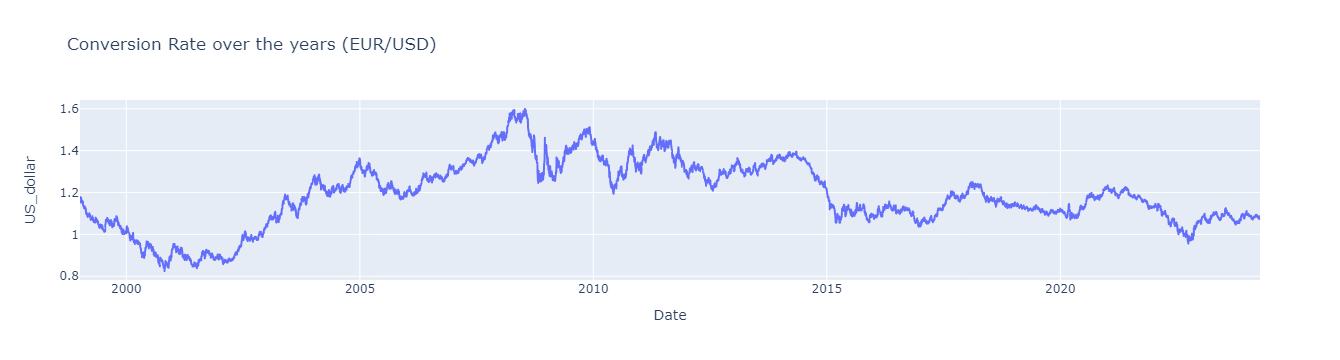

In [27]:
figure = px.line(data_filled, data_filled.index,
                 y="US_dollar",
                 title='Conversion Rate over the years (EUR/USD)')
figure.show()

Next, consider a bar plot of the yearly percentage growth of the exchange rate.

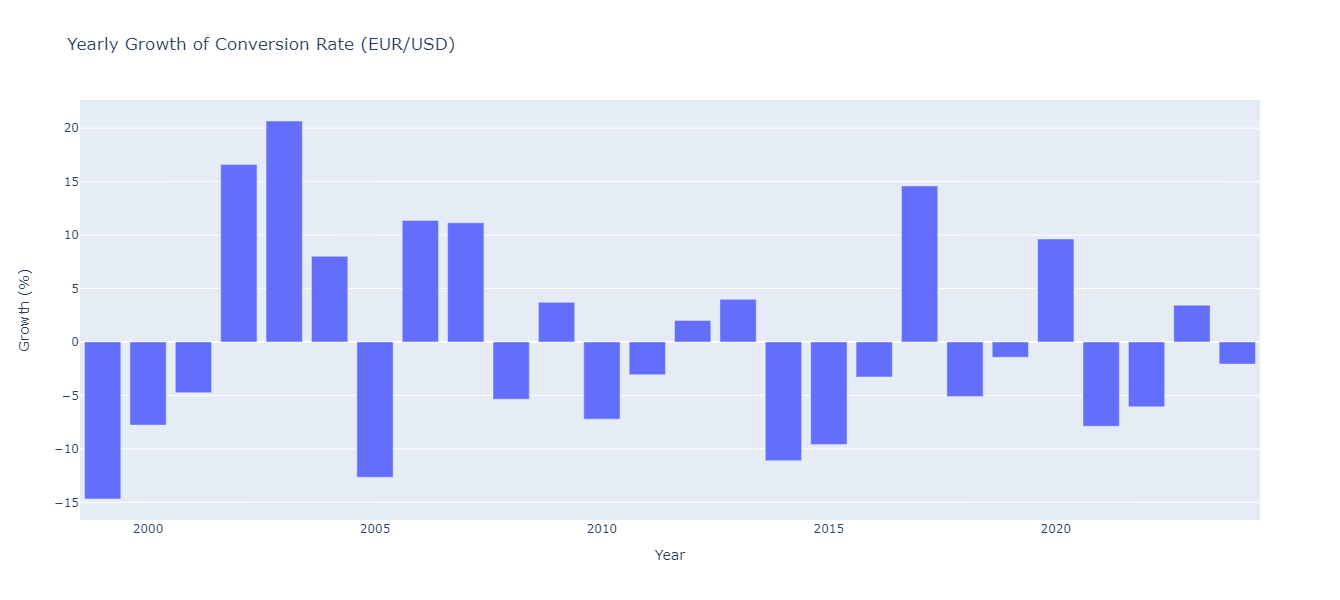

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignores future warnings to ensure the notebook is not disrupted

# Grouping the data by year and calculating the percent change in the rate
growth = data_filled.groupby('Year').agg({'US_dollar': lambda sub: ((sub.iloc[-1])-(sub.iloc[0]))/sub.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['US_dollar'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of Conversion Rate (EUR/USD)",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

**Autocorrelation and partial autocorrelation plots** [12] are graphical tools used in time series analysis to understand the correlation structure within a series. 

An autocorrelation plot, also known as a correlogram, displays the correlation of a time series with a lagged version of itself. In simpler terms, it shows how correlated a series is with its past values at different lags. It's purpose is to identify any repeating patterns or trends in the time series data and to determine the appropriate lag order for autoregressive models (AR) in time series forecasting. If the autocorrelation plot shows a significant correlation at lag 1, it indicates that the current value of the series is related to the immediate previous value. Significant autocorrelation at multiple lags suggests that the series follows a pattern or trend that repeats itself periodically. A lack of significant autocorrelation suggests randomness or no discernible pattern in the data. 

A partial autocorrelation plot displays the correlation between a series and its lagged values after removing the effect of intervening observations. In other words, it shows the correlation between the current value and its past values at specific lags, while controlling for the influence of other intermediate lags. The purpose of the PACF plot is to identify the lag structure of a time series and determine the appropriate lag order for autoregressive integrated moving average (ARIMA) modelsand to diagnose and detect seasonality or periodic patterns in time series data. Significant partial autocorrelation at lag 1 indicates a direct relationship between the current value and the immediate previous value, after accounting for the effects of other lags. Significant partial autocorrelation at higher lags suggests a direct relationship between the current value and past values at those specific lags, controlling for the effects of other lags. A partial autocorrelation of 0 at a specific lag indicates no correlation between the current value and its past values at that lag, after accounting for the effects of other lags.

For generating these plots, and future plots relevant to the modeling operation in this context, one can import the `statsmodels` package [14]. According to their website:

>`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

The `plot_acf()` and `plot_pacf()` from `statsmodels.graphics.tsaplots` will be used here. If one doesn't specify thw number of lags, the function selects a value. Anything within the blue intervals is not statisticalluy significant.

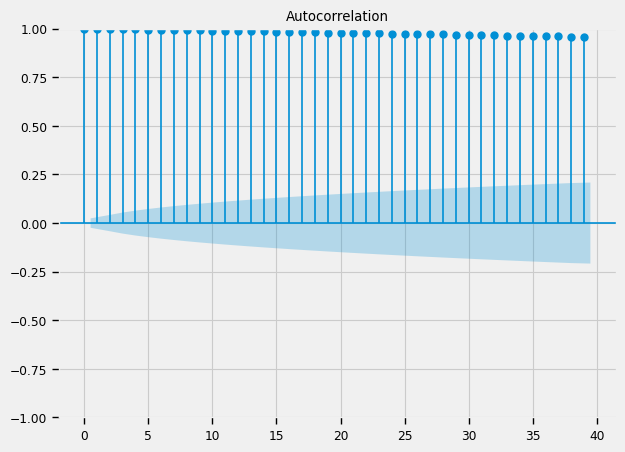

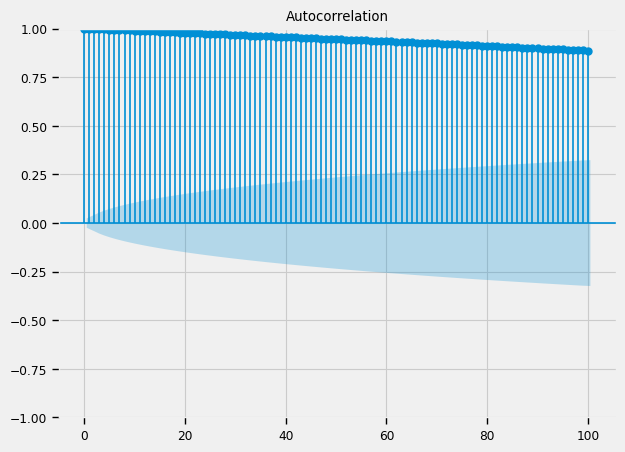

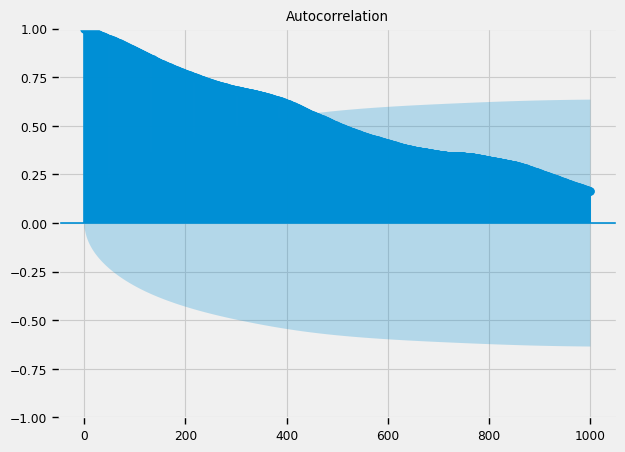

In [29]:
plot_acf(data_filled['US_dollar'])
plt.show()

plot_acf(data_filled['US_dollar'], lags = 100) # more lags for more insights
plt.show()

plot_acf(data_filled['US_dollar'], lags = 1000)
plt.show()

One can observe a decaying ACF. Thus, one is likely dealing with an Auto-Regressive process, and since there are several non-zero statistically significant autocorrelations, the time series is non-random. [13] Also, since the decay is gradual and extended, one can conclude that the data is non-stationary. [16] Stationarity is the property that the mean, variance and autocorrelation structure do not change over time. [17]

*What is an autoregression?*

>In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself. [15]

An autoregressive model of order $p$ can be written as
$$y_i = c +\phi_1y_{t-1} + \phi_2y_{t-2} + \dots + \phi_py_{t-]} + \epsilon_t$$

where $\epsilon_t$ is white noise. This is like a multiple regression but with lagged values of $y_t$ as predictors. One regeres to this as an $\text{AR}(p)$ model.

To confirm this is autoregression one needs to plot the PACF model.

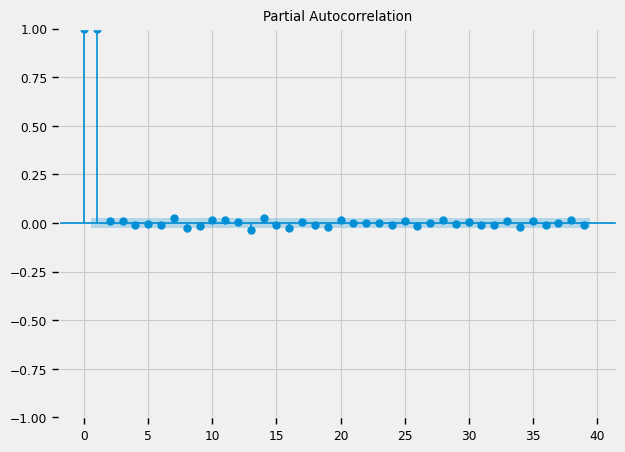

In [30]:
plot_pacf(data_filled['US_dollar'])
plt.show()

Based on the above, one should start with an autoregressive model with lags at 1. [13]

The autocorrelation analysis helps detect patterns and check for randomness. It’s especially important when one intends to use an autoregressive–moving-average (ARMA) model for forecasting because it helps to determine its parameters. Both the ACF and PACF assume stationarity of the underlying time series, i.e. the statistical properties of the series do not depend on the time at which the series is observed. While ACF includes all direct and indirect effects on preedicting future values, PACF only includes direct effects. [13]

Note that for both ACF and PACF, the lag 0 is ignored, since it is the correlation of the time series with itself and thus results in a perfect 1 too.

From the above plots, one can rewrite the model to: [20]
$$y_i = \phi_1y_{t-1}$$

Next, one can perform time series decomposition. This essentially splits the data into its constituent components, like trend, seasonality, and residual. One uses the `seasonal_decompose()` function in the `statsmodels.tsa.seasonal` package.

There are two ways to do this, the additive model, where the model suggests the components are added together, and the multiplicative model. [21]

The components of seasonal decomposition can be defined as follows:

1. The **trend** component of a time series data characterizes the overarching, sustained changes or patterns observed over time. It encapsulates the overall trajectory that the data follows.
2. The **seasonal** component of a time series data denotes the recurring patterns observed within specific time intervals, such as a year. 
3. The **residual** component of a time series data signifies the unexplained variability remaining once the trend and seasonal components have been factored out. It embodies the random fluctuations or discrepancies in the data that cannot be attributed to the underlying trend or seasonal patterns. [22]

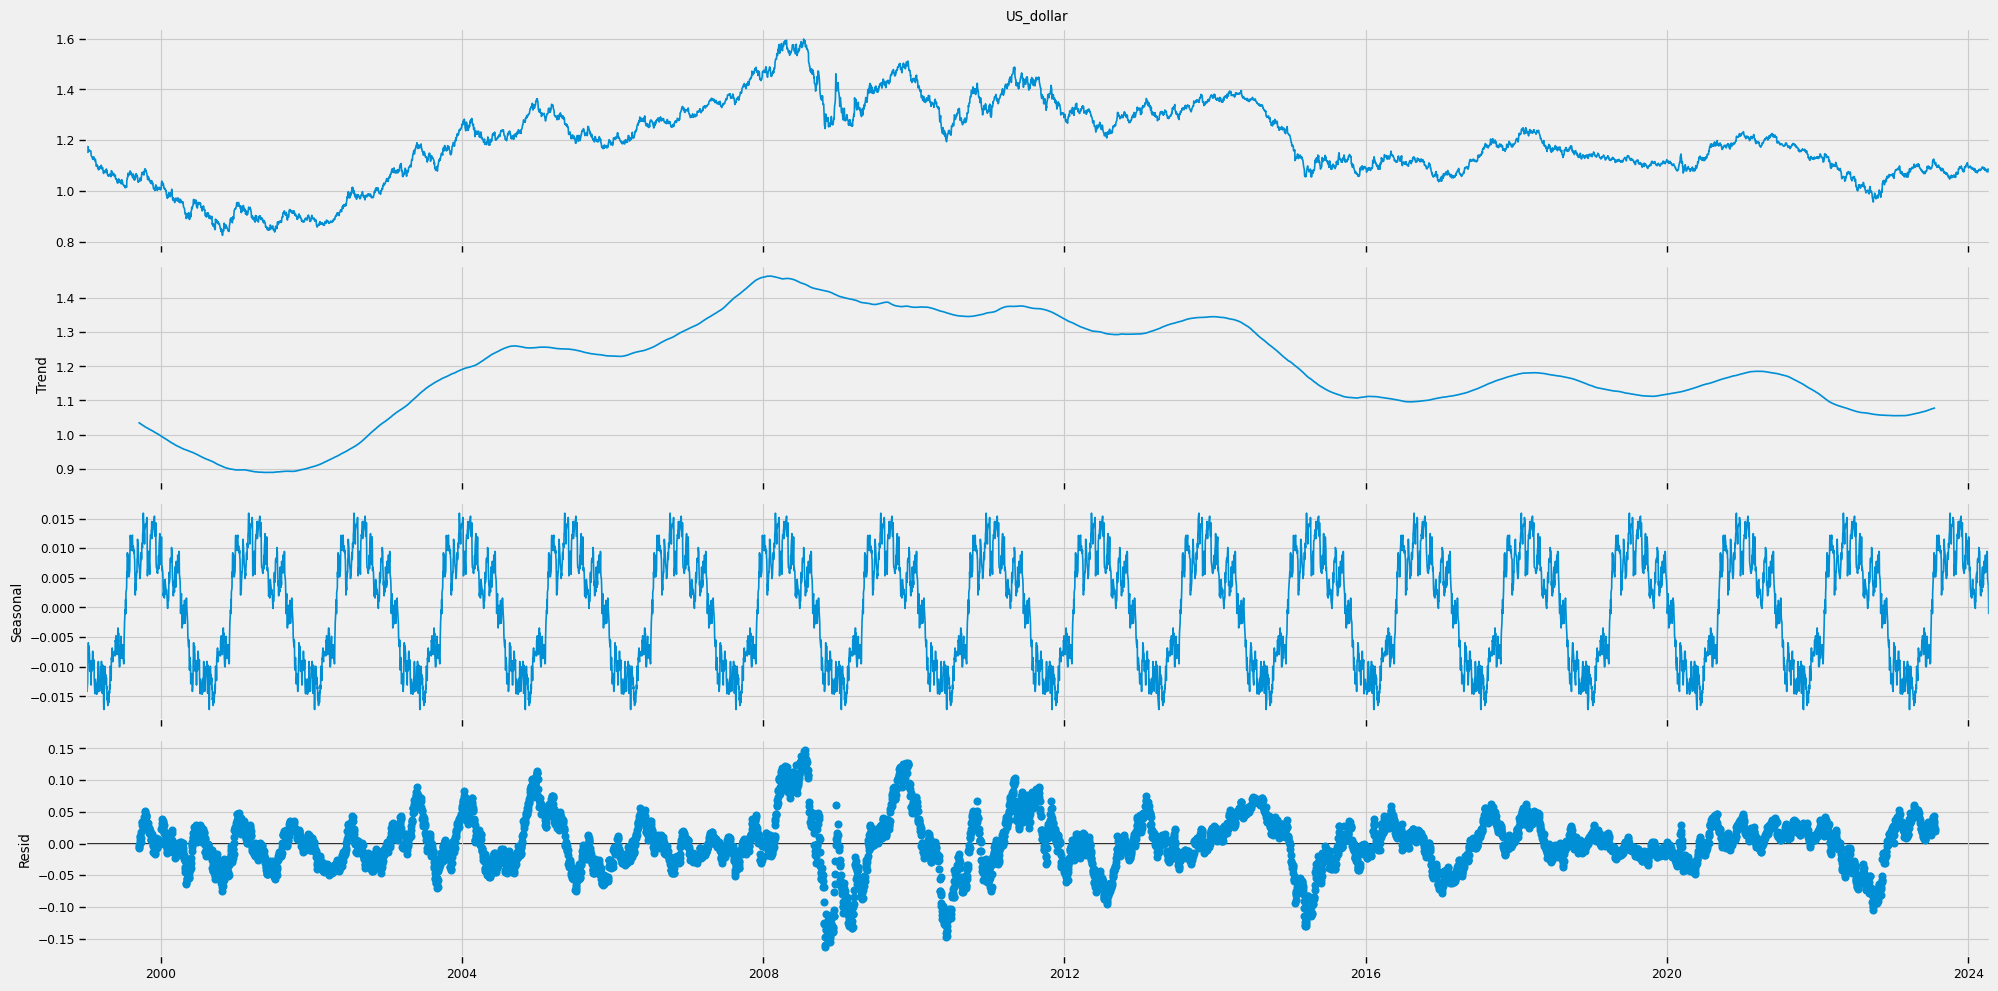

In [31]:
from pylab import rcParams # add styles to the plot
rcParams['figure.figsize'] = 20, 10
decomposition = seasonal_decompose(data_filled["US_dollar"], model='additive', period = 365) # additive seasonal index
fig = decomposition.plot()
plt.show()

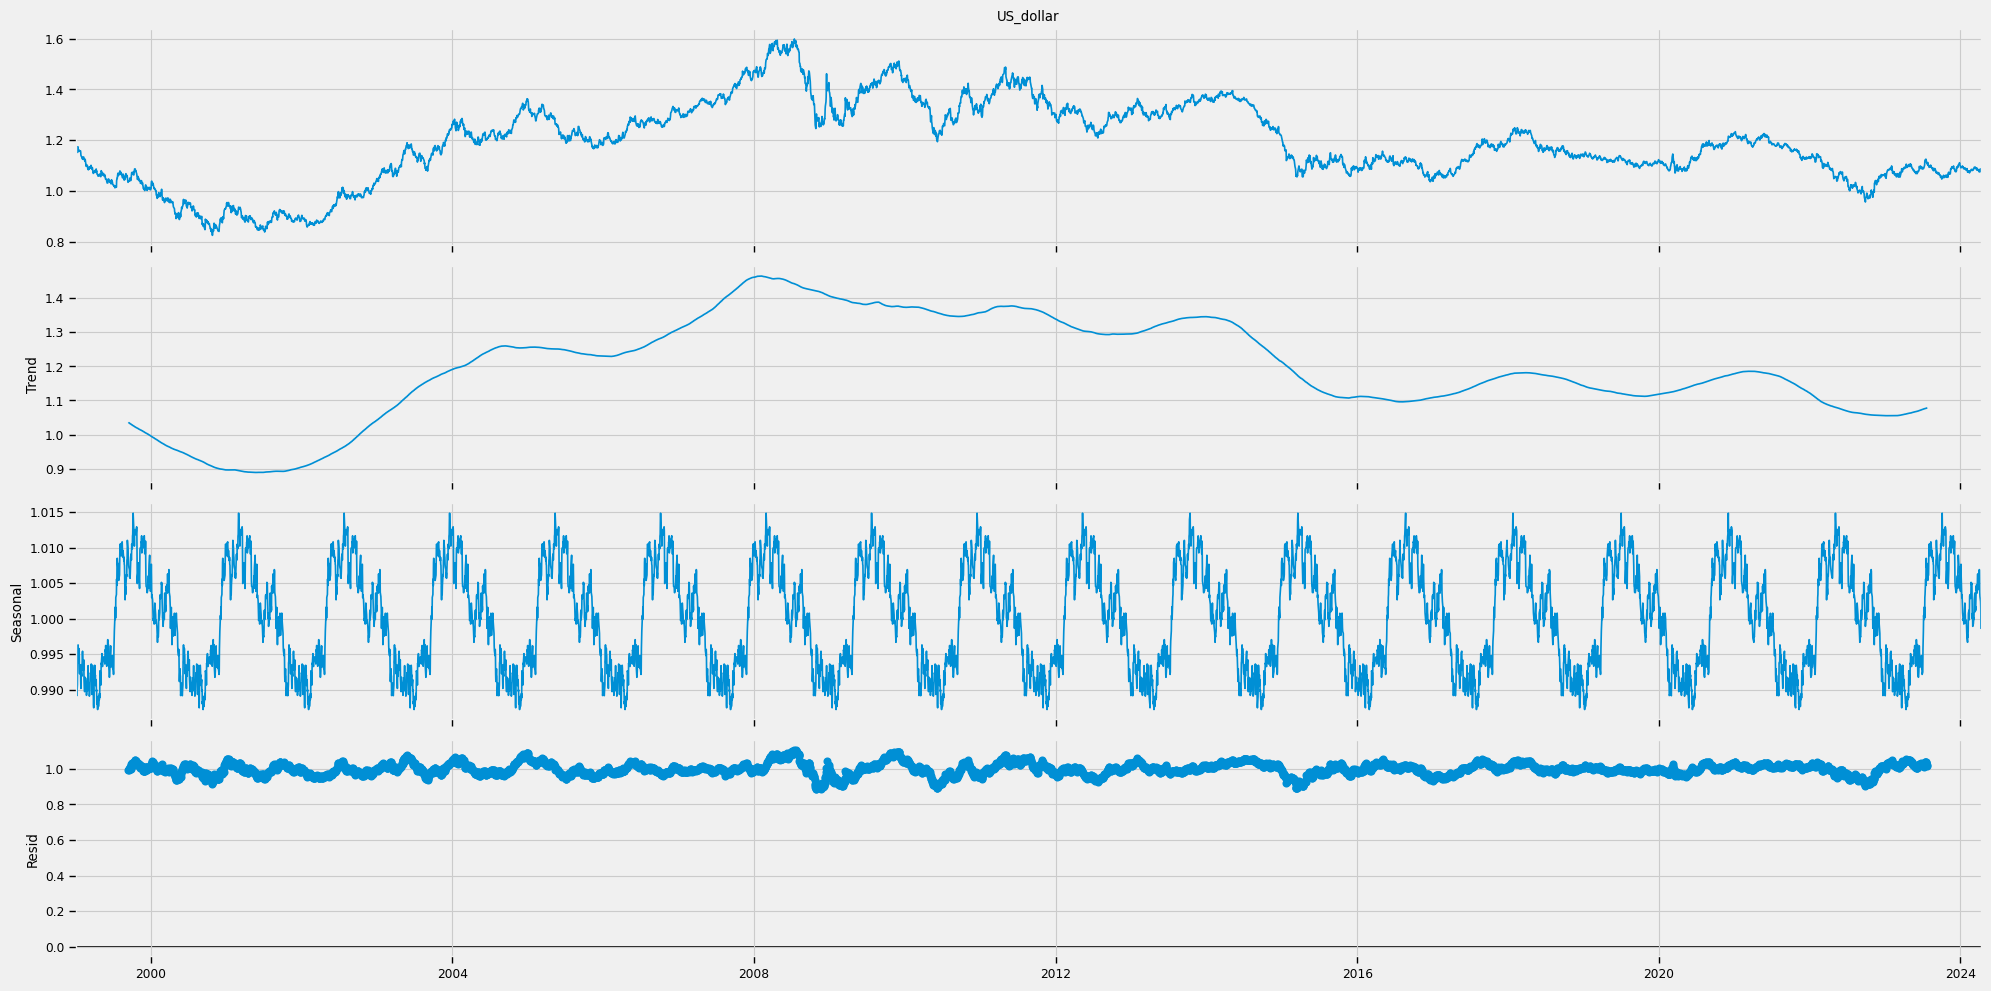

In [32]:
rcParams['figure.figsize'] = 20, 10
decomposition = seasonal_decompose(data_filled["US_dollar"], model='multiplicative', period = 365) # additive seasonal index
fig = decomposition.plot()
plt.show()

One can see the strong seasonality of the data. Thus, the model being selected is the SARIMA model.

To further examine the data, and handle its non-stationarity, one performs the Augmented Dickey-Fuller Test. The null hypothesis of this test is that the series has a unit root, or in other words, is non-stationary. [17] Consider a signficance level of 5%. One imports the `statsmodels.tsa.stattools` package for this test. Upon performing the test:

In [33]:
adf_test = adfuller(data_filled["US_dollar"], autolag = 'AIC')

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.800877
Critical Values @ 0.05: -2.86
p-value: 0.380026


One receives a test statistic less negative than the critical value offered at 5% significance, and a $p$-value greater than 0.05. Thus, one fails to reject the null hypothesis, and the fact stands that the data is non-stationary. [23] To manage this, one needs to *difference* the data. The differenced data will contain one less point than the original data. [17]

In [34]:
data_diff=data_filled['US_dollar'].diff(periods=350)

In [35]:
adf_test = adfuller(data_diff.dropna(), autolag = 'AIC')

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.436561
Critical Values @ 0.05: -2.86
p-value: 0.009774


Upon performing the ADF test again, one receives a more negative ADF statistic than the critical value. The result is thus statistically significant, backed up by the $p$- value that is less than 0.05. Thus, the data is now stationary.

One can now proceed with the modeling. One first handles the missing values in the differences data as done earlier in this study.

In [36]:
data_diff = data_diff.interpolate(method = 'time').fillna(method = 'bfill') # handles missing values by interpolation and backfilling

The **Seasonal Auto-Regressive Integrated Moving Average** is an extenstion of the ARIMA model, but for seasonal data. A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA models we have seen so far. [15] It is written as follows:

$$\text{ARIMA   }(p,d,q)\text{    }(P,D,Q)_m$$

where $(p,d,q)$ is the non-seasonal part of the model, while $(P,D,Q)_m$ is the seasonal part of the model, and $m$ is the number of observations per year.

One uses the `pmdarima` model's `auto_arima()` function [24], setting $m = 365$ to find the SARIMA parameters. This model will take a lot of time to run. Due to this, one sticks with $m = 12$ for the model generation. Feel free to change this, but please be informed that this may take a long time to generate.

In [37]:
model=auto_arima(data_diff,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-41951.702, Time=19.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-41952.689, Time=0.97 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-41951.486, Time=2.61 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-41951.568, Time=5.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-41954.526, Time=0.50 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-41953.489, Time=2.40 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-41953.572, Time=2.89 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-41952.246, Time=5.47 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-41950.691, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-41950.691, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-41948.452, Time=1.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 43.291 seconds


## Results

With the parameters generated, one can now proceed with fitting the model and makes predixtions using the `SARIMAX()` and `predict()` functions with the modeled parameters.

In [38]:
from statsmodels.tools.sm_exceptions import  ValueWarning
warnings.simplefilter('ignore', ValueWarning)

p, d, q = 0, 1, 0
model = SARIMAX(data_filled["US_dollar"], order=(p, d, q),
                seasonal_order=(p,d,q,52))
fitted = model.fit()
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          US_dollar   No. Observations:                 6535
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood               20616.197
Date:                            Fri, 19 Apr 2024   AIC                         -41230.394
Time:                                    11:55:11   BIC                         -41223.617
Sample:                                         0   HQIC                        -41228.050
                                           - 6535                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   1.09e-06     92.619      0.000     9.9e-05       0.000
Ljung-Box (L1) (Q):                

In this model, one makes predictions for the next 100 days. Feel free to change the value 100 for the day of your choice.

In [39]:
predictions = fitted.predict(len(data_filled), len(data)+100)
print(predictions)

6535    1.0681
6536    1.0704
6537    1.0695
6538    1.0672
6539    1.0741
         ...  
6631    1.0465
6632    1.0499
6633    1.0568
6634    1.0557
6635    1.0539
Name: predicted_mean, Length: 101, dtype: float64


The index values of these predictions are in ordinal dates, however, making integrartion with a plot difficult. Thus, one needs to convert the indices into `datetime64` format.

In [40]:
pred_indices = np.array(predictions.index.tolist()) + (data_filled.index[-1].toordinal()-predictions.index[0])
pred_indices = np.array([date.fromordinal(x) for x in pred_indices])
predictions.index = pred_indices
print(predictions)

2024-04-11    1.0681
2024-04-12    1.0704
2024-04-13    1.0695
2024-04-14    1.0672
2024-04-15    1.0741
               ...  
2024-07-16    1.0465
2024-07-17    1.0499
2024-07-18    1.0568
2024-07-19    1.0557
2024-07-20    1.0539
Name: predicted_mean, Length: 101, dtype: float64


Seeing that this has been successful, one can now plot the modeled values with the training data using the `plotly` functions in order to see exactly what value is associated with which day. Hover over the plot to explore!

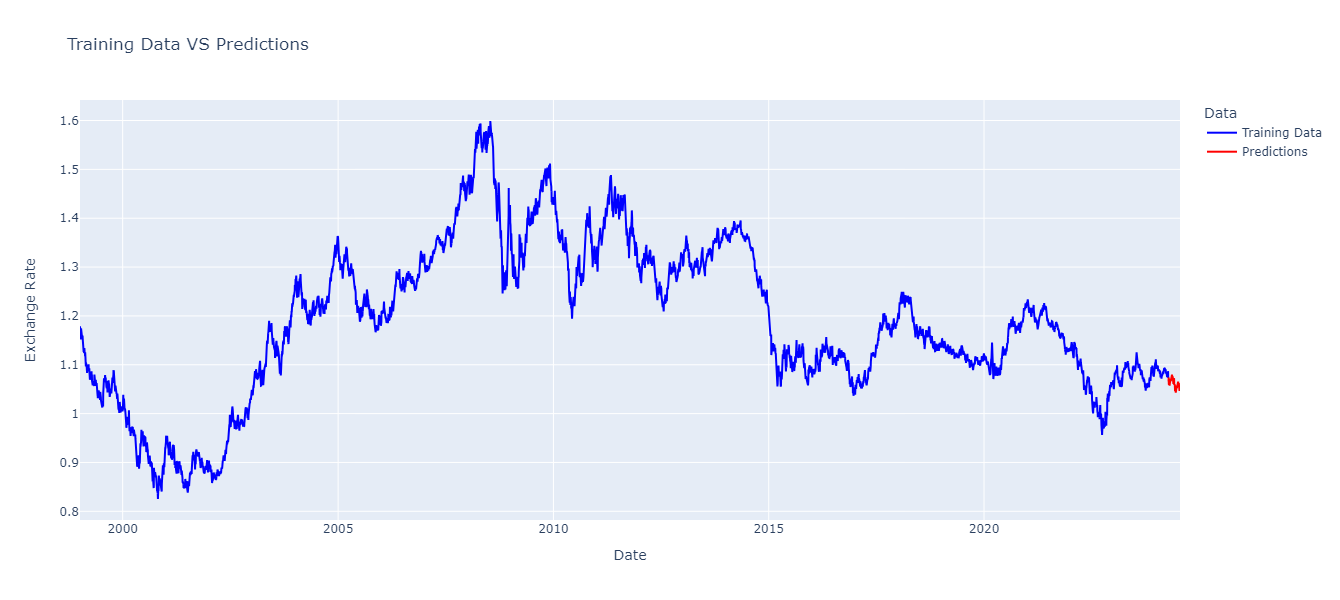

In [41]:
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data_filled.index,
    y=data_filled['US_dollar'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='red')
))

fig.update_layout(
    title="Training Data VS Predictions",
    xaxis_title="Date",
    yaxis_title="Exchange Rate",
    legend_title="Data",
    width=1000,
    height=600
)

pio.show(fig)

Now, to make the prediction.

In [42]:
# Converting to a Series
predictions = pd.Series(predictions)

# Finding the index for April 15, 2024 or the fourth index value from 11 April
predictions[4]

1.074100011489345

According to the Wall Street Journal, the value was between 1.0622 and 1.0667 [25]. This is a rather close prediction, considering the concessions made to ensure the program runs. A closer answer could have been estimated if the $m$ value was set at 365, the number of times in a year we had data for.

## Discussion and Conclusion

### Answers to the Questions

Through this study, the answer to the primary focus of the study was approximated. With data until April 11, 2024, and taking into consideration the concession made to the SARIMA model to ensure it runs, the estimated rate, off by an error of 0.7%, was 1.0741 USD per Euro.

As for the additional questions targeted, one could conclude that it is indeed possible to observe the effect of world events through visualizations of the time series data, and that linear regression is not the best way to work with time series data.

### Challenges encountered

In the context of the study, the heavy nature of the machine learning model, and the learning curve, was a definite challenge I encountered through the synthesis of this project. Additionally, technological constraints and long simulation times impacted me from doing a more accurate analysis.

### What did I learn?

I learned about time series analysis and its applications in econometrics. I also learned that there are quantitative methods to find out which model can be used. I was able to delve into machine learning, designing a worthwile project.

### Future

To improve upon this study, I can find better models that fit this data. Examples are random walks and long short-term memory models. I can also try to get a larger computing system to be able to run the SARIMA model with actual parameters.

## Appendix

### Escape sequences

To insert certain special, or illegal characters in a string, escape sequences are used. They are introduced in regular strings with the use of a backslash and an identifying character. Common escape sequences are `\t` for tabspaces, `\n` for the carriage return or a new line, and `\\` to add a backslash and ensure the IDE doesn't read an actual backslash as an escape sequence. One can even produce a bell or beep sound, depending on the IDE, using `\a`.

## References

[1] "Strong and Weak Currencies," *Federal Reserve Bank of St. Louis*, September 2023. [Online]. Available: https://fredblog.stlouisfed.org/2023/09/strong-and-weak-currencies/

[2] "The Dollar as the World's Reserve Currency," *Council on Foreign Relations*. [Online]. Available: https://www.cfr.org/backgrounder/dollar-worlds-reserve-currency

[3] "A Comprehensive Guide to Time Series Analysis," *Analytics Vidhya*, October 2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

[4] "Exploring Africa, Mainstreaming Indonesia's Economic Diplomacy in Non-traditional Market," *Centre for Policy Analysis and Development on Asia-Pacific and African Regions, Policy Analysis and Development Agency, Ministry of Foreign Affair of the Republic of Indonesia*, p. 80, 2012.

[5] "BRICS: What is the group and which countries have joined?" *BBC News*, 1 February 2024. [Online]. Available: https://www.bbc.com/news/world-66525474.

[6] "Erdogan blames Turkey's currency woes on foreign financial tools as central bank reserves fall," *CNBC*, 13 January 2022. [Online]. Available: https://www.cnbc.com/2022/01/13/erdogan-blames-turkeys-currency-woes-on-foreign-financial-tools-as-central-bank-reserves-fall.html.

[7] D. M. Diez, C. D. Barr, and M. Çetinkaya-Rundel, "OpenIntro Statistics," *OpenIntro, Inc.*, 2015.

[8] "Coefficient of Determination (R-squared)," *Newcastle University.* [Online]. Available: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html.

[9] "How to remove xticks from a plot?," *Stack Overflow*, 21 October 2012. [Online]. Available: https://stackoverflow.com/questions/12998430/how-to-remove-xticks-from-a-plot.

[10] "Residual Plot: Definition, How to Create & Interpret," *Statistics How To.* [Online]. Available: https://www.statisticshowto.com/residual-plot/.

[11] "Time Series Analysis: Definition, Types, Techniques, and When It's Used," *Tableau*. [Online]. Available: https://www.tableau.com/learn/articles/time-series-analysis.

[12] "Autocorrelation Plots," *NIST Engineering Statistics Handbook*. [Online]. Available: https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm.

[13] "ACF & PACF Code Example : Time Series Talk," *ritvikmath*. [Online]. Available: https://www.youtube.com/watch?v=y8opUEd05Dg.

[14] "statsmodels 0.14.1," *statsmodels*. [Online]. Available: https://www.statsmodels.org/stable/index.html.

[15] R. J. Hyndman and G. Athanasopoulos, "Forecasting: Principles and Practice," *OTexts*, 2018. [Online]. Available: https://otexts.com/fpp2/AR.html. 

[16] Leonie, "Time Series: Interpreting ACF and PACF," *Kaggle*,  [Online]. Available: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf.

[17] "Stationarity," *NIST Engineering Statistics Handbook*. [Online]. Available: https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm.

[18] "Time Series Talk : Stationarity," *ritvikmath*. [Online]. Available: https://www.youtube.com/watch?v=oY-j2Wof51c.

[19] D. Chemkaeva, "Daily Exchange Rates per Euro 1999-2023," *Kaggle*, [Online]. Available: https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020.

[20] L. Monigatti, "Interpreting ACF and PACF Plots for Time Series Forecasting," *Towards Data Science*, Aug. 2, 2022. [Online]. Available: https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061

[21] J. Brownlee, "How to Decompose Time Series Data into Trend and Seasonality," *Machine Learning Mastery*. [Online]. Available: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/.

[22] N. Malkari, "Seasonal Decomposition," *Medium*, [Online]. Available: https://medium.com/@nikhilmalkari18/seasonal-decomposition-425a2d7490e8.

[23] V. K. G., "Statistical Tests to Check Stationarity in Time Series," *Analytics Vidhya*, [Online]. Available: https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/.

[24] "pmdarima: ARIMA estimators for Python," *Alkaline ML*. [Online]. Available: https://alkaline-ml.com/pmdarima/.

[25] "Historical Prices of EUR/USD," *The Wall Street Journal*. [Online]. Available: https://www.wsj.com/market-data/quotes/fx/EURUSD/historical-prices.